# Insurance Claims- Fraud Detection

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# Importing Necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data Collection 

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
# Checking the shape of the dataset.

data.shape

(1000, 40)

In [4]:
# Checking the total columns in dataset.

data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
# Checking the dataset summary.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

There are total 21 object, 17 int, 2 float data types columns in our dataset.

In [6]:
# Checking the missing values.

data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are 1000 missing values in dataset column _c39.

In [7]:
# We will drop the _c39 column as it contains all entries as null values.

data.drop('_c39',axis=1,inplace=True)

In [8]:
# Now lets check the shape of data after dropping the '_c39' column.

data.shape

(1000, 39)

We successfully dropped the '_c39' column from our dataset.

In [9]:
# Checking the unique values.

data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Almost all columns contains unique values.

In [10]:
# We will check the missing values columns with the '?' sign.

# columns with ? entries
data.columns[(data == '?').any()]

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

There are three columns with '?' missing values sign.

In [11]:
# Checking feature "collision_type" value counts.

data["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [12]:
# Checking feature 'property_damage' value counts.

data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [13]:
# Checking feature 'police_report_available' value counts.

data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

From the above we got 343 in police_report_available column, 360 in property_damage column, 178 in collision_type column with '?' as missing value sign. 

In [14]:
# We will replace the '?' missing value sign with name 'unfixed'.

data['police_report_available'] = data['police_report_available'].replace("?", "unfixed")
data['collision_type'] = data['collision_type'].replace("?", "unfixed")
data['property_damage'] = data['property_damage'].replace("?", "unfixed")

Lets checked the value count after replaceing the '?' sign with the name 'unfixed'

In [15]:
# Checking feature 'police_report_available' value counts.

data['police_report_available'].value_counts()

unfixed    343
NO         343
YES        314
Name: police_report_available, dtype: int64

In [16]:
# Checking feature 'property_damage' value counts.

data['property_damage'].value_counts()

unfixed    360
NO         338
YES        302
Name: property_damage, dtype: int64

In [17]:
# Checking feature "collision_type" value counts.

data["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
unfixed            178
Name: collision_type, dtype: int64

We have successfully replaced the '?' missing value sign with name 'unfixed'.

In [18]:
# Checking the statistical summary of the dataset.

data.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00

Here we can see the total count is 1000 that means data don't contain any missing value but our values such as mean, std, min, max values of dataset are very much fluctuating that means data must contain the outliers. 

# Exploratory Data Analysis(EDA)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

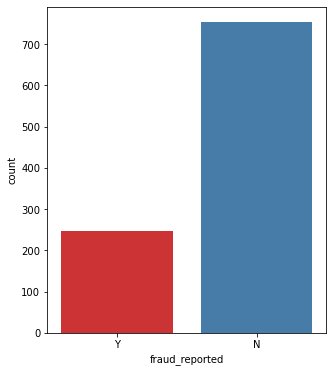

In [19]:
# Visualizing Target column using bar plot.

plt.figure(figsize=(5,6))
sns.countplot("fraud_reported", data=data, palette='Set1')

Upto approx.250 frauds are reported and above 700 frauds are not reported.

In [20]:
# Visualizing the numerical columns.

numerics=data[['months_as_customer','age','policy_number']]

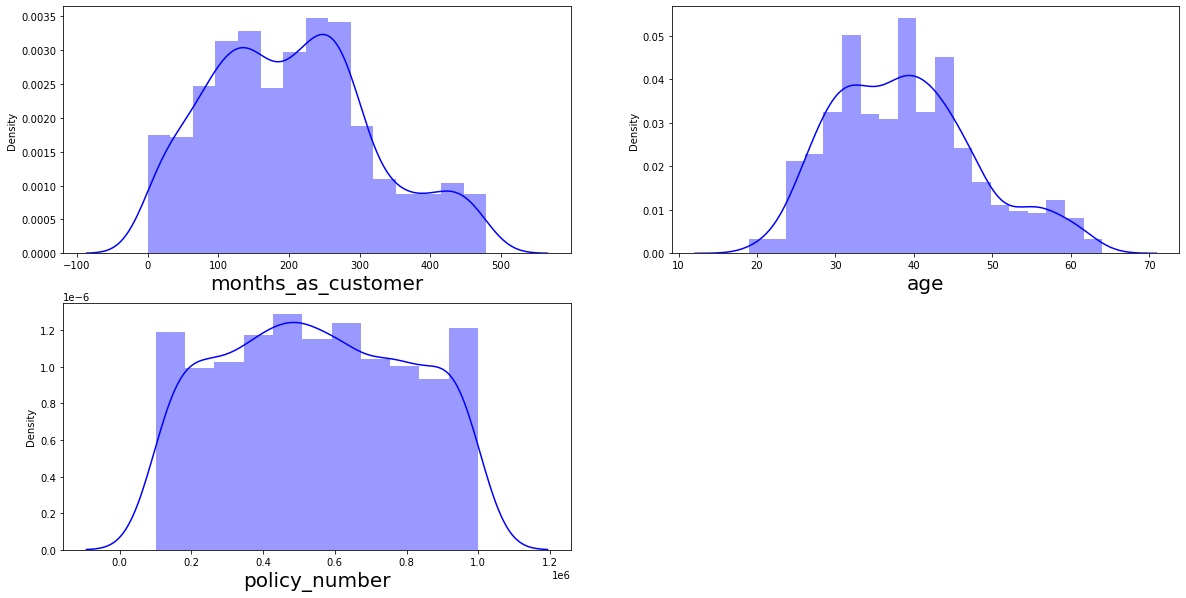

In [21]:
# Visualizing 3 columns using distribution plot.

plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
 
for column in numerics:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1   
plt.show()  

The above three columns somehow shows the normal trend, In 'month_as_customer' column most of the customers are customers in range 0-300, In 'age' column, we can say that the average age is 40, In 'policy_number' column most of the policies are in range 0.1-1.0, and it may not be useful for us so may be we will drop it further.

In [22]:
# We have to convert the datetime columns to date data type.

data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data["policy_bind_yr"] = data["policy_bind_date"].dt.year

In [23]:
# We have to convert the datetime columns to data data type.

data['incident_date'] = pd.to_datetime(data['incident_date'])
data["incident_month"] = data["incident_date"].dt.month

In [24]:
data.head(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   

   insured_zip  ... total_claim_amount injury_claim property_claim  \
0       466132  ...              71610         6510          13020   
1       468176  ...               5070          780            780   

  vehicle_claim auto_make  auto_model  auto_year fraud_reported  \
0         52080      Saab         92x       2004              Y   
1          3510  Mercedes        E400       2007              Y   

  policy_bind_yr incident_month  
0           2014              1  
1           2006              1  

[2 rows x 41 columns]

we have successfully extracted the years from 'policy_bind_data' and 'incident_date' columns

<AxesSubplot:xlabel='policy_bind_yr', ylabel='count'>

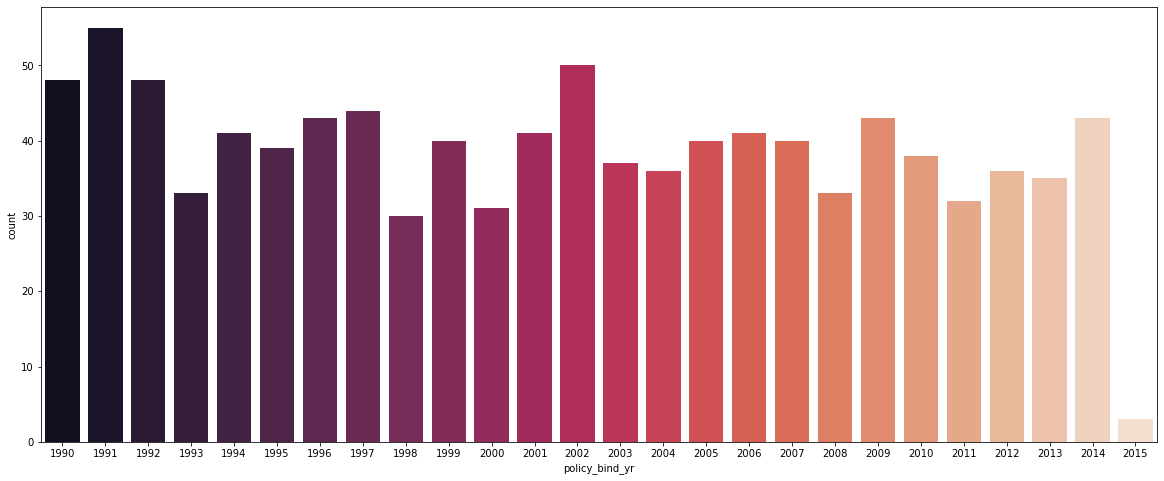

In [25]:
# Visualizing 'policy_bind_yr' column.

fig, axes = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot("policy_bind_yr", data=data, ax=axes,palette='rocket')

'policy_bind_yr' shows that for how much years the policy is binded.

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

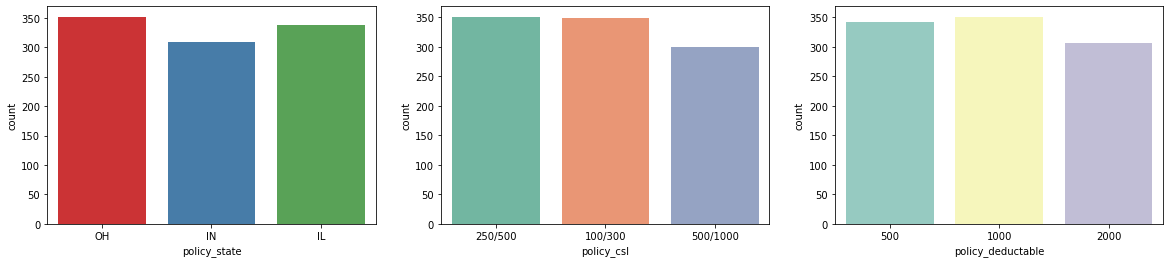

In [26]:
# Plotting the countplot for categorical features.

fig,axes = plt.subplots(1, 3, figsize=(20, 4))
sns.countplot("policy_state", data=data, ax=axes[0],palette='Set1')
sns.countplot("policy_csl", data=data, ax=axes[1],palette='Set2')
sns.countplot("policy_deductable", data=data, ax=axes[2],palette='Set3')

fig1. Here from above countplot we can conclude that, 'policy_state' column has 3 categories which contains almost same count.

fig2. 'policy_csl' column has 3 categories which contains almost same count in 250/500, 100/300 and less in 500/1000.

fig3. Similarly,'policy_deductable' column has 3 categories which contains almost same count for 500, 1000 and less for 2000.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

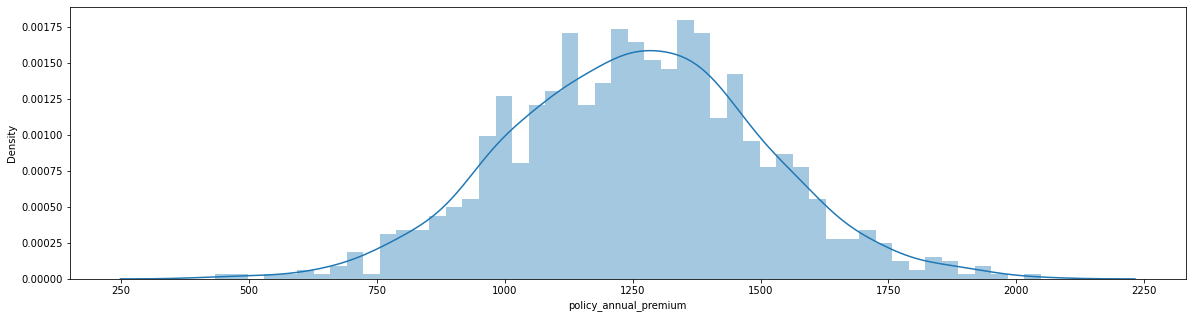

In [27]:
# Visualizing column "policy_annual_premium".

plot_sub = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_sub
sns.distplot(data["policy_annual_premium"], bins=50 , ax=ax1)

From above distplot, we can observe that the 'policy_annual_premium' column shows normal trend and the average premium value is approx. 1250.

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

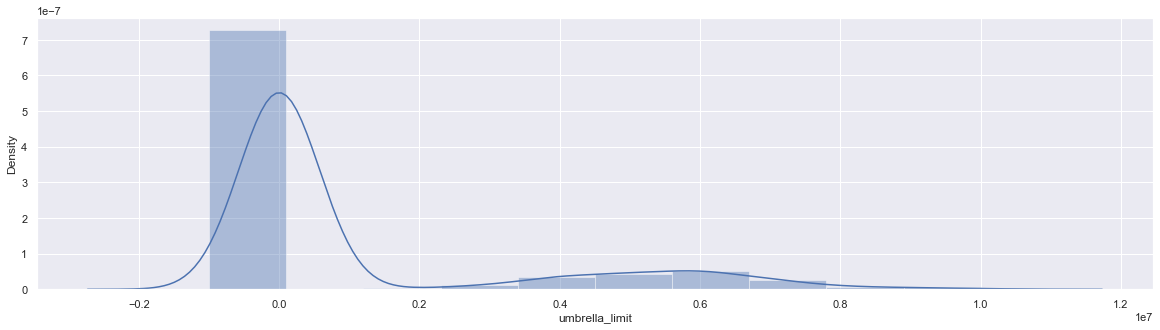

In [28]:
# Visualizing column "umbrella_limit".

sns.set(style="darkgrid")
plot_sub = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_sub
sns.distplot(data["umbrella_limit"], bins=10 , ax=ax1)


 Here we can see that umbrella limit is ranging in between -0.2 to 0.2 but it is highely skewed for the value 0 and also the limit can never be zero so we have to manipulate the limit.

In [29]:
data['umbrella_limit']=data['umbrella_limit'].replace(-1000000,0)

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

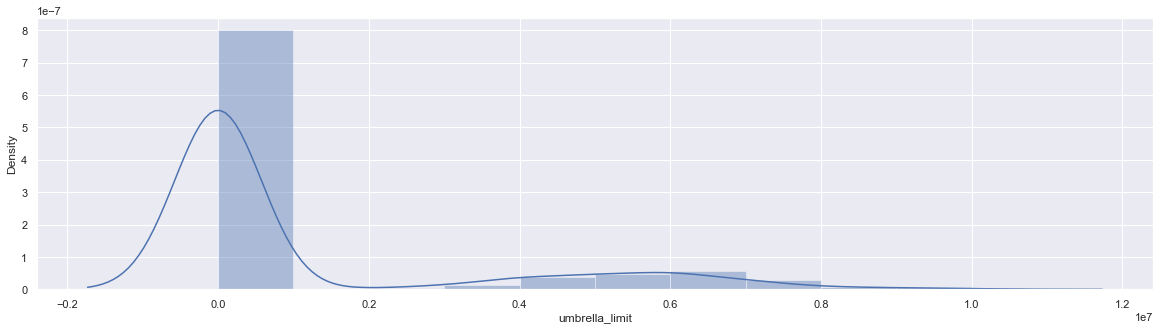

In [30]:
sns.set(style="darkgrid")
plot_sub = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_sub
sns.distplot(data["umbrella_limit"], bins=10 , ax=ax1)

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

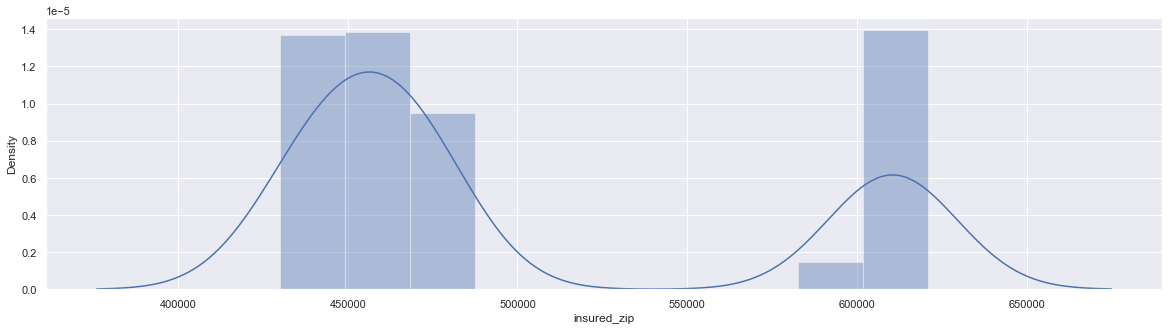

In [31]:
# Visualizing 'insured_zip' column.

sns.set(style="darkgrid")
plot_sub = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_sub
sns.distplot(data["insured_zip"], bins=10 , ax=ax1)

Here we can see that the 'insured_zip' column shows two bell shape curves that means it has high no. of unique values.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

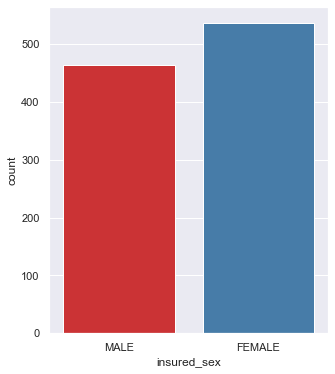

In [32]:
# Visualizing 'insured_sex' column.

plt.figure(figsize=(5,6))
sns.countplot("insured_sex", data=data, palette='Set1')

From the above countplot we can say that, the no. of 'Females' are more as compared to 'Males 

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

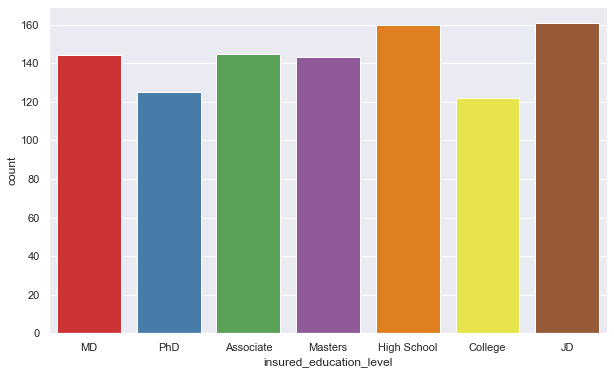

In [33]:
# Visualizing 'insured_education_level' column.

plt.figure(figsize=(10,6))
sns.countplot("insured_education_level", data=data, palette='Set1')

Here the 'insured_education_level' column has 7 categories and higher no. for high school and JD, here less value is for college and PhD.

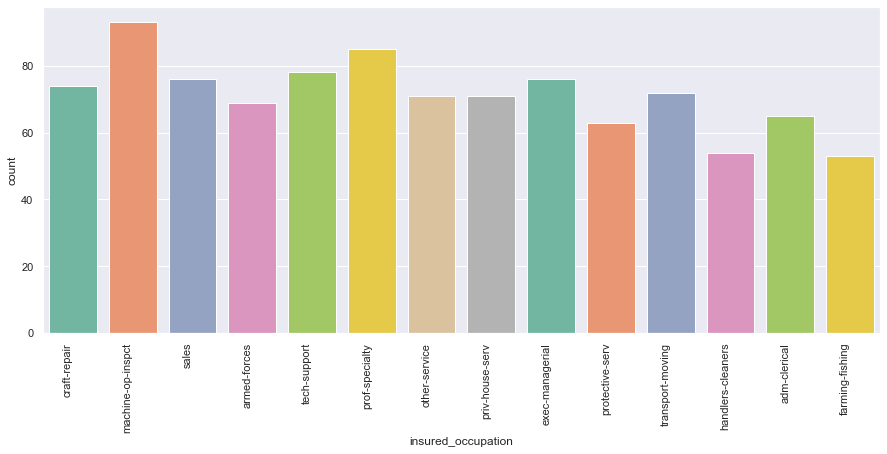

In [34]:
# Visualizing 'insured_occupation' column.

plt.figure(figsize=(15,6))
sns.countplot("insured_occupation", data=data, palette='Set2')
plt.xticks(ha='right',rotation=90)
plt.show()

The above feature shows 14 categories of different occupation but the highest value is for machine-op-inspct and lowest value is for two, they are handlers-cleaners and farming-fishing.

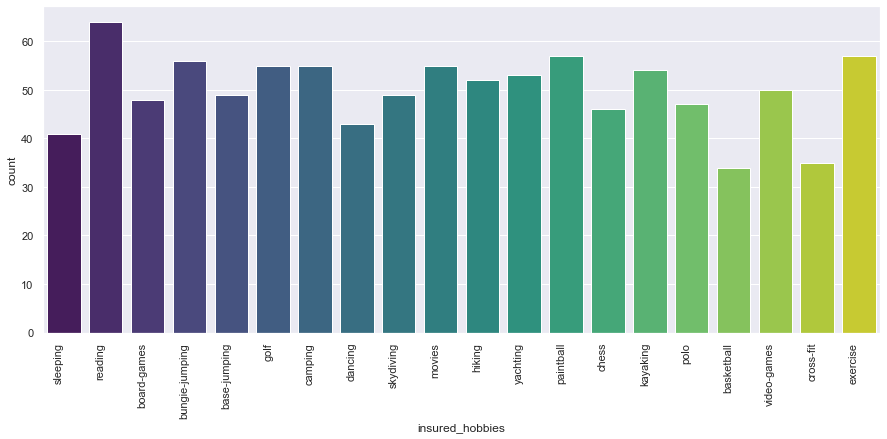

In [35]:
# Visualizing 'insured_hobbies' column.

plt.figure(figsize=(15,6))
sns.countplot("insured_hobbies", data=data, palette='viridis')
plt.xticks(ha='right',rotation=90)
plt.show()

Here the above feature shows 20 different categories of hobbies, the highest value is for hobby reading and lowest is for basketball.

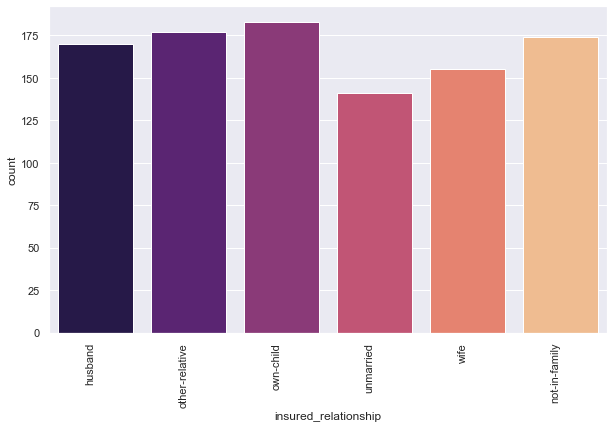

In [36]:
# Visualizing 'insured_relationship' column.


plt.figure(figsize=(10,6))
sns.countplot("insured_relationship", data=data, palette='magma')
plt.xticks(ha='right',rotation=90)
plt.show()

In the above, there are 6 categories in relationship column, In them own-child has highest value and unmarried has lowest value.

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

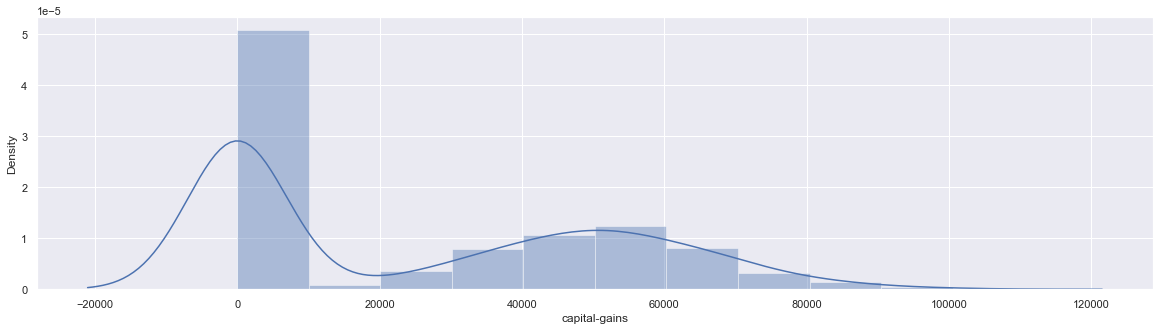

In [37]:
# Visualizing 'capital_gain' column.

sns.set(style="darkgrid")
plot_sub = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_sub
sns.distplot(data["capital-gains"], bins=10 , ax=ax1)

The capital-gains column shows highly skewed data with centred value zero.

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

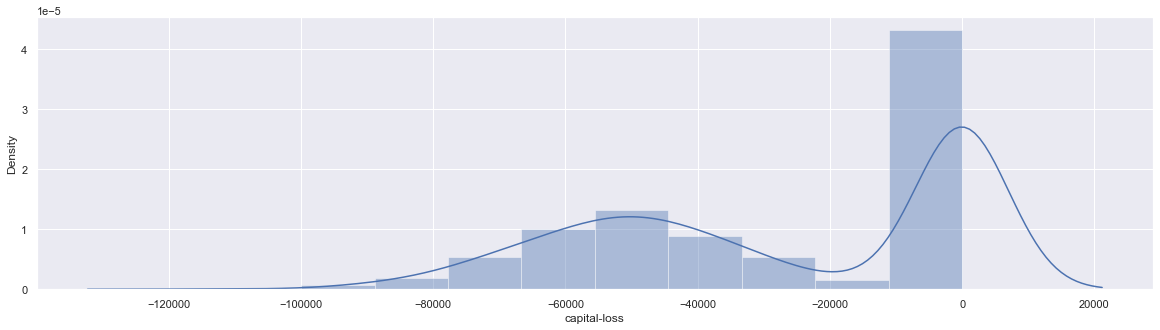

In [38]:
# Visualizing 'capital-loss' column.

sns.set(style="darkgrid")
plot_sub = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_sub
sns.distplot(data["capital-loss"], bins=10 , ax=ax1)

The capital-loss column shows highly left skewed data with centred value zero.

<AxesSubplot:xlabel='incident_month', ylabel='count'>

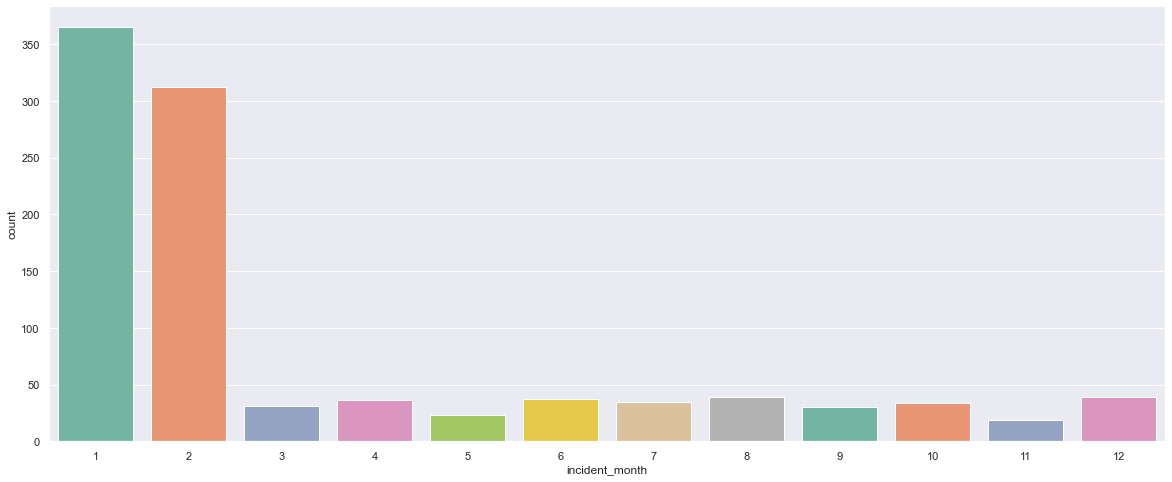

In [39]:
# Visualizing 'incident_month' column.

fig, axes = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot("incident_month", data=data, ax=axes,palette='Set2')

'incident_month' shows the month in which the incident happened,most of the incidents were happened in 1st month and lowest in 11th month.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

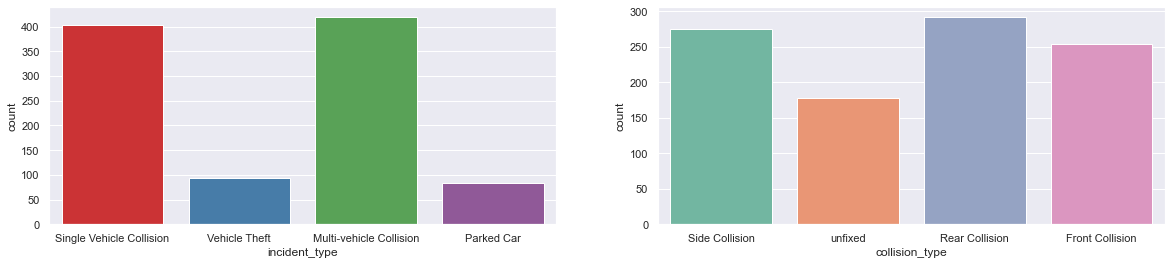

In [40]:
# Visualizing 'incident_type','collision_type' columns using count plot.

fig,axes = plt.subplots(1, 2, figsize=(20, 4))
sns.countplot("incident_type", data=data, ax=axes[0],palette='Set1')
sns.countplot("collision_type", data=data, ax=axes[1],palette='Set2')

In fig.1, most no. of incidents were happened by single vehicle collision and multi-vehicle collision, similarly less incidents were happened by vehicle theft and parked-car.

In fig.2, most of collision type are Rear collision and less are unfixed.

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

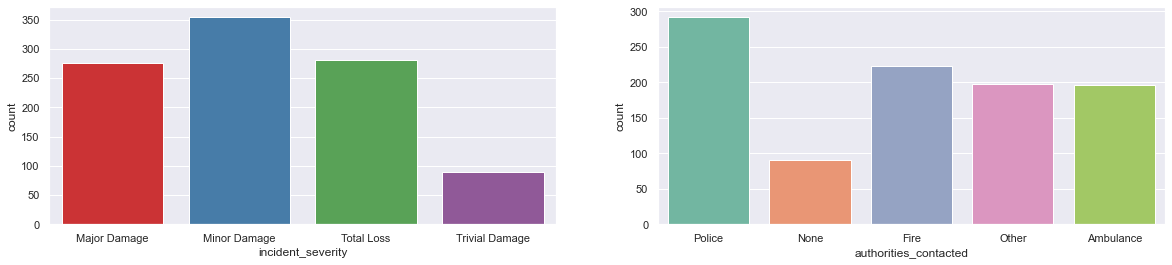

In [41]:
# Visualizing the incident_severity,authorities_contacted columns using countplot.

fig,axes = plt.subplots(1, 2, figsize=(20, 4))
sns.countplot("incident_severity", data=data, ax=axes[0],palette='Set1')
sns.countplot("authorities_contacted", data=data, ax=axes[1],palette='Set2')

In fig.1, most of the incidents have Minor Damage and very less incidents have Tivial Damage.

In fig.2, most of the authorities contacted are Police, then Fire,other,Ambulance have almost equal count and None authorities are less counted.

<AxesSubplot:xlabel='incident_city', ylabel='count'>

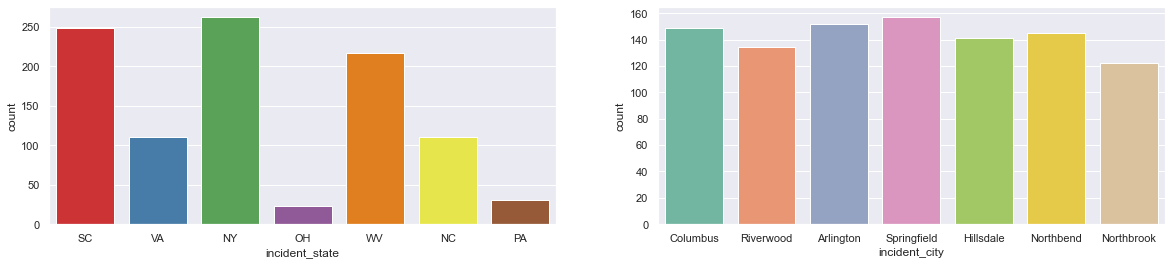

In [42]:
# Visualizing incident_state,incident_city columns using countplot.

fig,axes = plt.subplots(1, 2, figsize=(20, 4))
sns.countplot("incident_state", data=data, ax=axes[0],palette='Set1')
sns.countplot("incident_city", data=data, ax=axes[1],palette='Set2')

In fig.1, Incident_state NY has highest values count and OH has lowest value count.

In fig.2, Incident_city Springfield has highest values count and Northbrook has lowest value count, remaing all other cities have moderate values count.

Here In 'incident_location' column has all 1000 unique values so, its better to drop it.

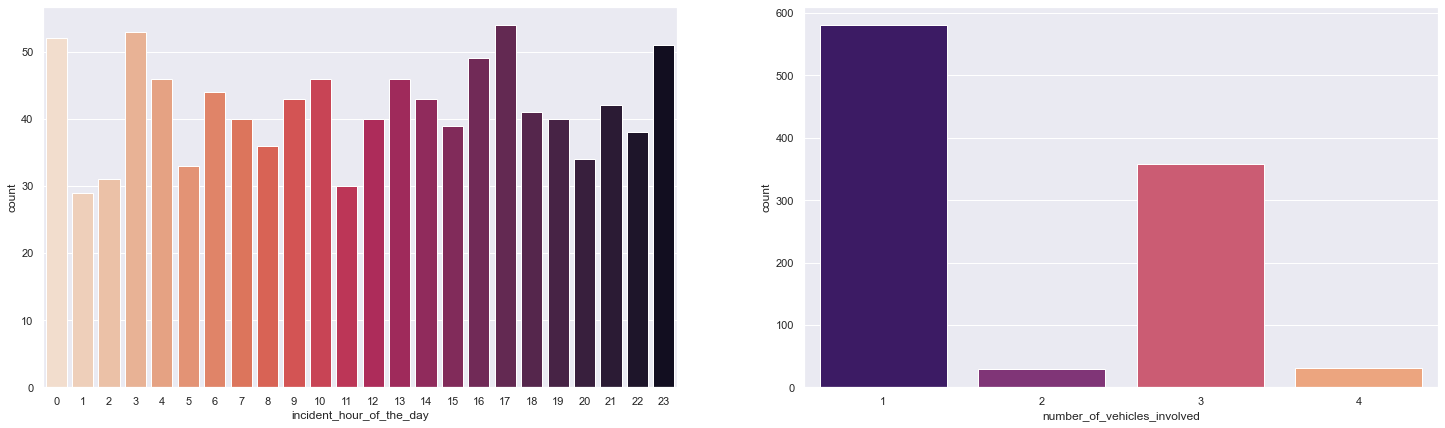

In [43]:
# Visualizing 'incident_hour_of_the_day','number_of_vehicles_involved' column using count plot.

fig,axes = plt.subplots(1, 2, figsize=(25, 7))
sns.countplot("incident_hour_of_the_day", data=data, ax=axes[0],palette='rocket_r')
sns.countplot("number_of_vehicles_involved", data=data, ax=axes[1],palette='magma')
plt.show()

In fig.1, Most of the incidents occur in between range 3 to 17 hours.

In fig.2, Most of the vehicle involved is one and least 2 vehicles are involved.

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

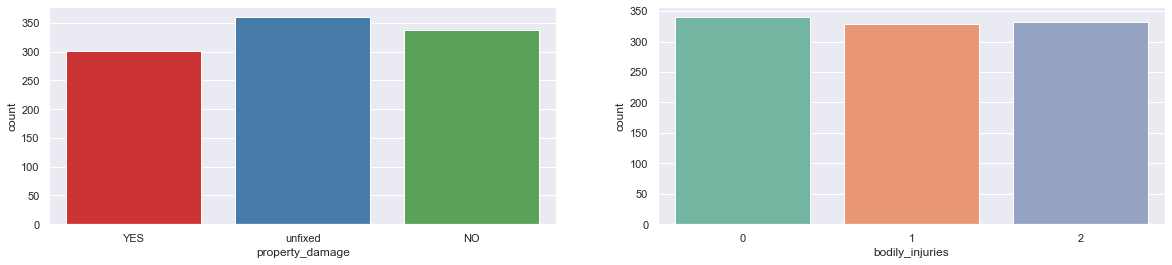

In [44]:
# Visualizing property_damage,bodily_injuries columns using countplot.

fig,axes = plt.subplots(1, 2, figsize=(20, 4))
sns.countplot("property_damage", data=data, ax=axes[0],palette='Set1')
sns.countplot("bodily_injuries", data=data, ax=axes[1],palette='Set2')

In fig.1, Most of the property damage is not fixed or recorded

In fig.2, Most of the People dont have any bodily injury.

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

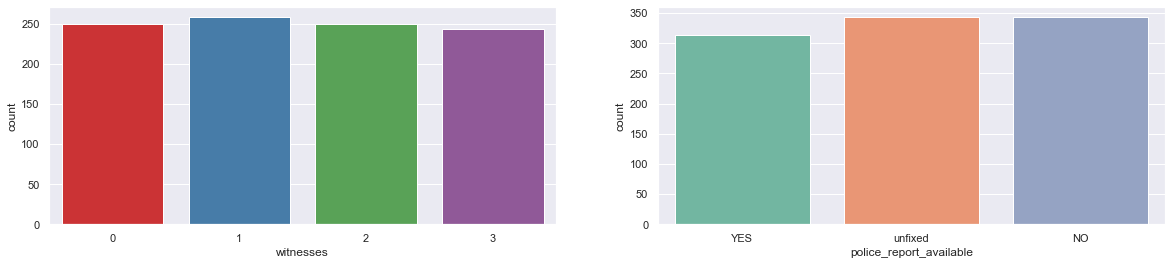

In [45]:
# Visualizing 'witnesses','police_report_available' columns using countplot.

fig,axes = plt.subplots(1, 2, figsize=(20, 4))
sns.countplot("witnesses", data=data, ax=axes[0],palette='Set1')
sns.countplot("police_report_available", data=data, ax=axes[1],palette='Set2')

In fig.1, most of the incidents have only 1 witness and all other are moderate.

In fig.2, contains 3 categories and most are missing that is unfixed category.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

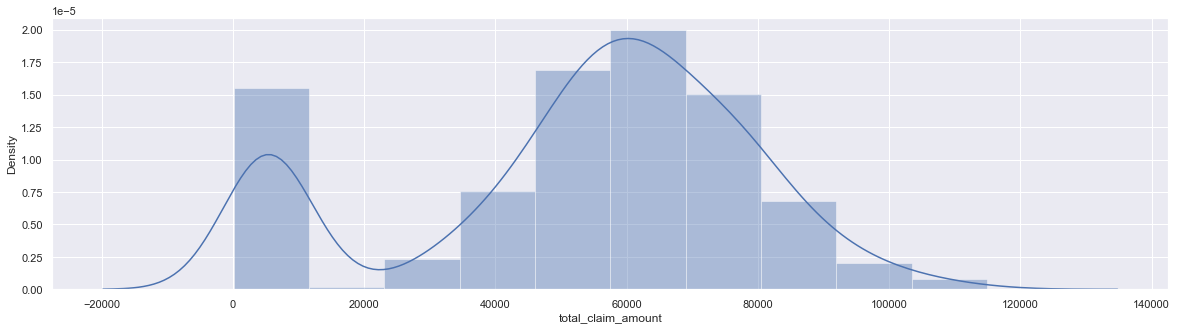

In [46]:
# Visualizing 'total_claim_amount' column.

sns.set(style="darkgrid")
plot_sub = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_sub
sns.distplot(data["total_claim_amount"], bins=10 , ax=ax1)

The above graph shows two curves that means 'total_claim_amount' has two distributions, one ranges from 0 to 20000 and another between 20000 to 120000. 

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

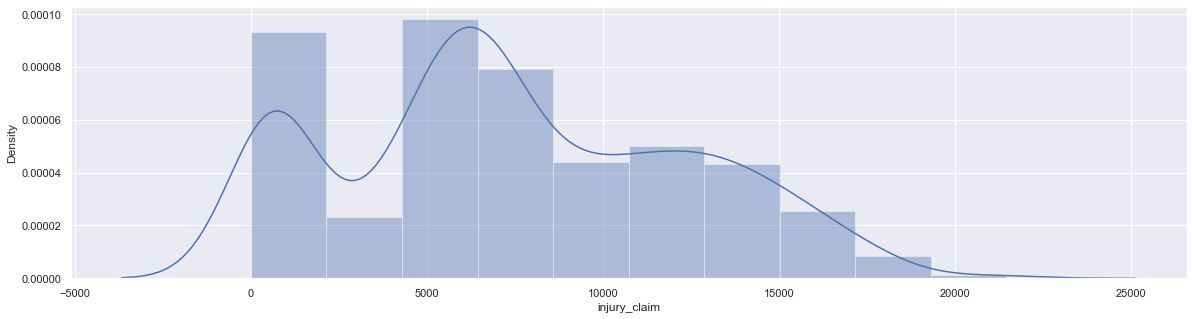

In [47]:
# Visualizing 'injury_claim' column.

sns.set(style="darkgrid")
plot_sub = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_sub
sns.distplot(data["injury_claim"], bins=10 , ax=ax1)

The insurance_claim column ranges in between 0 to 25000.

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

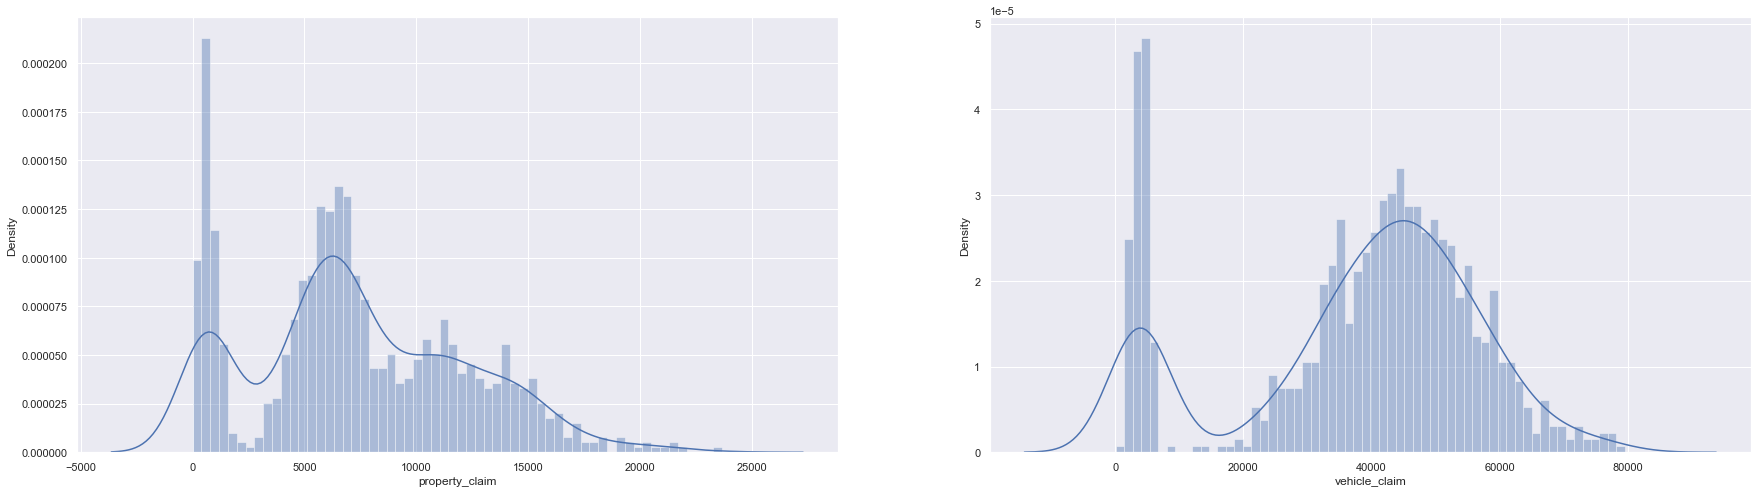

In [48]:
# Visualizing 'property_claim' and 'vehicle_claim' columns.

sns.set(style="darkgrid")
plot_sub = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))
fig, (ax1, ax2) = plot_sub

sns.distplot(data["property_claim"], bins=60 , ax=ax1)

sns.distplot(data["vehicle_claim"], bins=60 , ax=ax2)



In both figures, there are two distributions first ranging in between 0 to 25000 and second ranging in 0 to 80000.

<AxesSubplot:xlabel='auto_year', ylabel='count'>

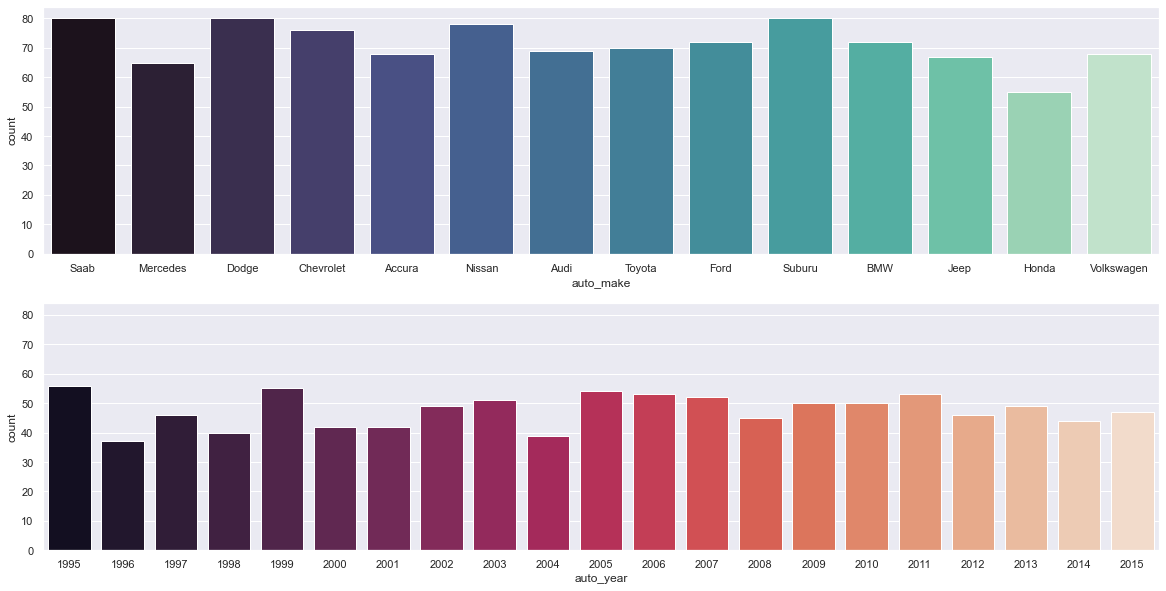

In [49]:
# Visualizing 'auto_year','auto_make' columns.

fig, axes = plt.subplots(2, 1, figsize=(20,10), sharey=True)
sns.countplot("auto_make", data=data, ax=axes[0],palette='mako')
sns.countplot("auto_year", data=data, ax=axes[1],palette='rocket')


Here 'auto_make' shows the different brands of different campany that manufactures the cars.

'auto_year' column shows the manufacturing year of the car.

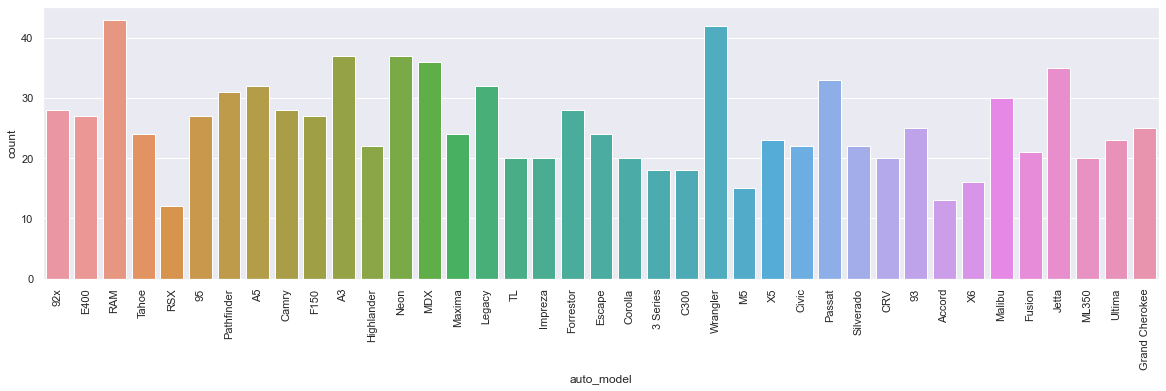

In [50]:
# Visualizing 'auto_model' column.

fig, axes = plt.subplots(1, 1, figsize=(20, 5), sharey=True)
sns.countplot("auto_model", data=data, ax=axes)
plt.xticks(rotation=90)
plt.show()

"auto_model" shows the car model which has very high cardinality due to different car types.

# Encoding

In [51]:
dictionary_bool = {"Y":1, "N":0}
data["fraud_reported"] = data["fraud_reported"].map(dictionary_bool) 

In [52]:
data.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-06-09           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... total_claim_amount injury_claim property_claim  \
0       466132  ...              71610         6510          13020   
1       468176  ...               5070          780            780   
2       430632  ...              34650         7700           3850   
3       608117  ...              63400         6340           6340   
4       610706  ...               6500         1300            650   

  vehicle_claim  auto_make  auto_model  auto_year fraud_reported  \
0         52080       Saab         92x       2004              1   
1          3510   Mercedes        E400       2007              1   
2         23100      Dodge         RAM       2007              0   
3         50720  Chevrolet       Tahoe       2014              1   
4          4550     Accura         RSX       2009              0   

  policy_bind_yr incident_month  
0           2014              1  
1           2006              1  
2           2000              2  
3           1990             10  
4           2014              2  

[5 rows x 41 columns]

In [53]:
# Let's check the numeric columns.
data._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_bind_yr', 'incident_month'],
      dtype='object')

In [54]:
# Let's check categorical columns.
data.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')

In [55]:
# Checking the relation of "auto_model" and "incident_date" which are high cardinal values with the dependent feature "fraud_reported"

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
dummy = pd.get_dummies(data[['auto_model','incident_date']], drop_first=True)
dummy['fraud_reported'] = data['fraud_reported']
dummy.head(5)

incident_date  auto_model_92x  auto_model_93  auto_model_95  auto_model_A3  \
0    2015-01-25               1              0              0              0   
1    2015-01-21               0              0              0              0   
2    2015-02-22               0              0              0              0   
3    2015-10-01               0              0              0              0   
4    2015-02-17               0              0              0              0   

   auto_model_A5  auto_model_Accord  auto_model_C300  auto_model_CRV  \
0              0                  0                0               0   
1              0                  0                0               0   
2              0                  0                0               0   
3              0                  0                0               0   
4              0                  0                0               0   

   auto_model_Camry  ...  auto_model_RAM  auto_model_RSX  \
0                 0  ...               0               0   
1                 0  ...               0               0   
2                 0  ...               1               0   
3                 0  ...               0               0   
4                 0  ...               0               1   

   auto_model_Silverado  auto_model_TL  auto_model_Tahoe  auto_model_Ultima  \
0                     0              0                 0                  0   
1                     0              0                 0                  0   
2                     0              0                 0                  0   
3                     0              0                 1                  0   
4                     0              0                 0                  0   

   auto_model_Wrangler  auto_model_X5  auto_model_X6  fraud_reported  
0                    0              0              0               1  
1                    0              0              0               1  
2                    0              0              0               0  
3                    0              0              0               1  
4                    0              0              0               0  

[5 rows x 40 columns]

# Checking Correlation

In [56]:
data.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015806  0.018277       0.008936   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
fraud_reported                         0.020544  0.012143      -0.029443   
policy_bind_yr                        -0.048276 -0.037444      -0.040099   
incident_month                         0.024659  0.023404      -0.042512   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010420              -0.006102   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
fraud_reported                        0.014817              -0.014480   
policy_bind_yr                       -0.049598               0.001249   
incident_month                       -0.006418               0.021559   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015806     0.017895       0.006399   
age                                0.018277     0.025604      -0.007075   
policy_number                      0.008936     0.007083       0.009802   
policy_deductable                  0.010420     0.004545       0.035212   
policy_annual_premium             -0.006102     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019294      -0.047676   
insured_zip                        0.019294     1.000000       0.006303   
capital-gains                     -0.047676     0.006303       1.000000   
capital-loss                      -0.023647     0.049372      -0.046904   

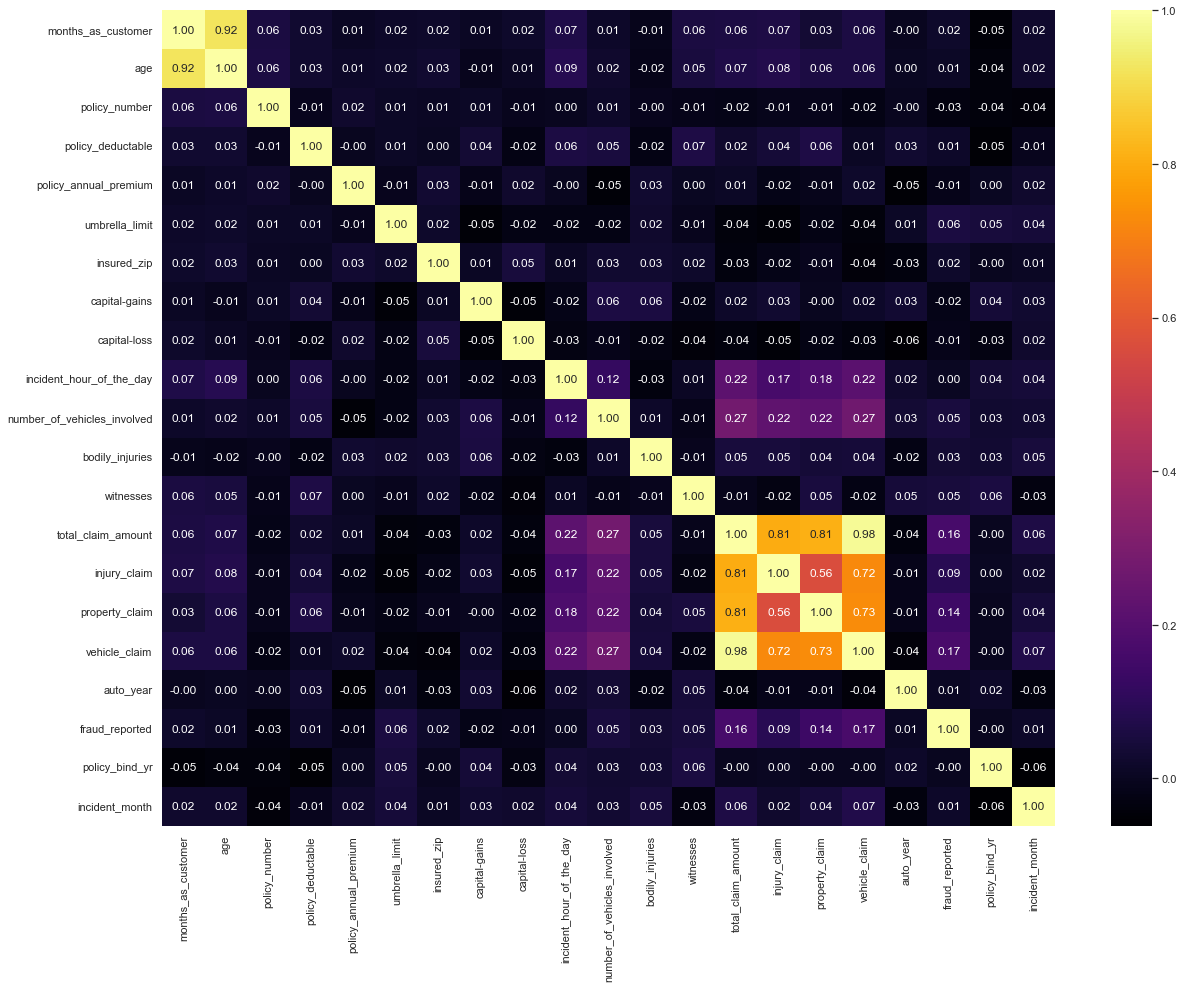

In [57]:
# Visualizing correlation using heatmap. 

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno',fmt='0.2f')
plt.show()

Here most of the features shows correlation with eachother.

# Bi-variate Analysis

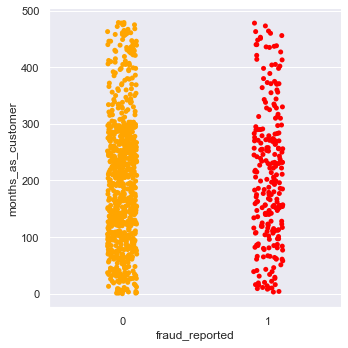

In [58]:
# Visualizing 'fraud_reported vs

sns.catplot(data=data, x="fraud_reported", y="months_as_customer", kind='strip', palette=['orange','red'])

Most of the frauds were repoted in months of range 0 to 300.

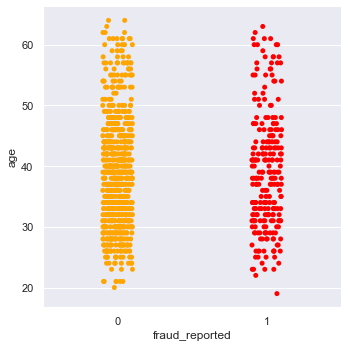

In [59]:
sns.catplot(data=data, x="fraud_reported", y="age", kind='strip', palette=['orange','red'])

Most of the frauds are reported for the age range above 20 and below 50.

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

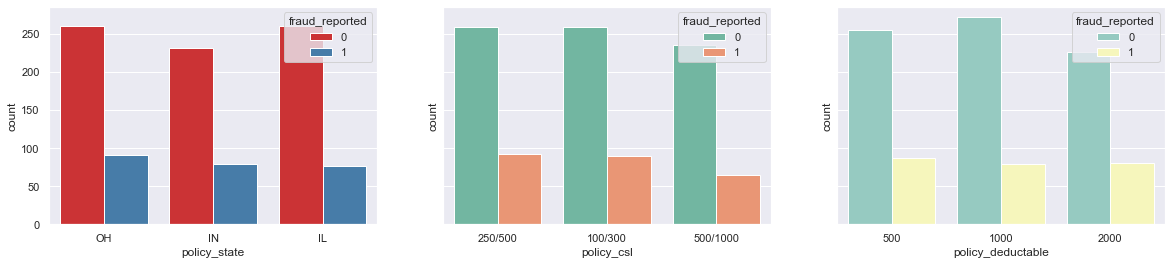

In [60]:
# Visualizing 'policy_state','policy_csl','policy_deductatable' columns using countplot.

fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
sns.countplot(x="policy_state", data=data, hue="fraud_reported", ax=axes[0], palette='Set1')
sns.countplot(x="policy_csl", data=data, hue="fraud_reported", ax=axes[1], palette='Set2')
sns.countplot(x="policy_deductable", data=data, hue="fraud_reported", ax=axes[2], palette='Set3')

In fig.1, fraud reported is almost moderate in all the 3 categories.

In fig.2, first 2 categories are showing same count and the 3rd one has lower value count as compared to other two.

In fig.3, the fraud reported for all 3 categories is almost equal.

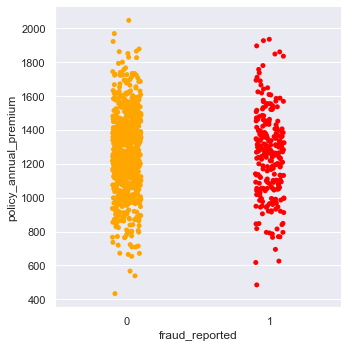

In [61]:
sns.catplot(data=data, x="fraud_reported", y="policy_annual_premium", kind='strip', palette=['orange','red'])

The policy_premium is lower for cutomers who did some fraud and more for non-fraud customers.

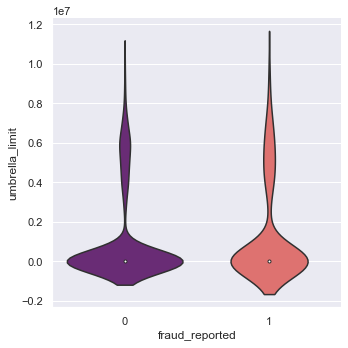

In [62]:
# Visualizing 'umbrella_limit vs fraud_reported' column using violin plot.

sns.catplot(data=data, x="fraud_reported", y="umbrella_limit", kind='violin', palette='magma')

We cannnot significantly interpret the umbrella_limit with fraud_reported and fraud_not reported.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

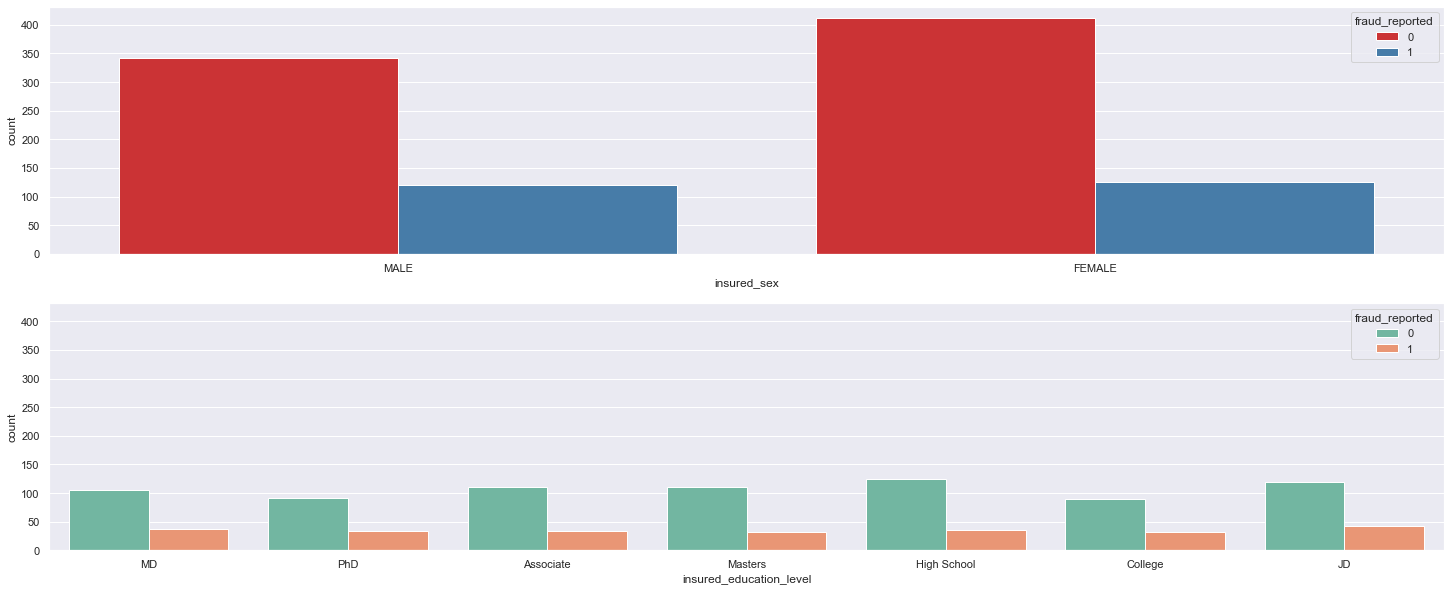

In [63]:
# Visualizing 'insured_sex vs fraud_reported' and 'insured_education_level' using countplot.

fig, axes = plt.subplots(2, 1, figsize=(25,10), sharey=True)
sns.countplot(x="insured_sex", data=data, hue="fraud_reported", ax=axes[0], palette='Set1')
sns.countplot(x="insured_education_level", data=data, hue="fraud_reported", ax=axes[1], palette='Set2')


In fig.1,Most no. of frauds are recorded for females as compared to males.

In fig.2, the frauds_reported for all educational levels are almost moderate except for highschool and JD,it is little bit highe.

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

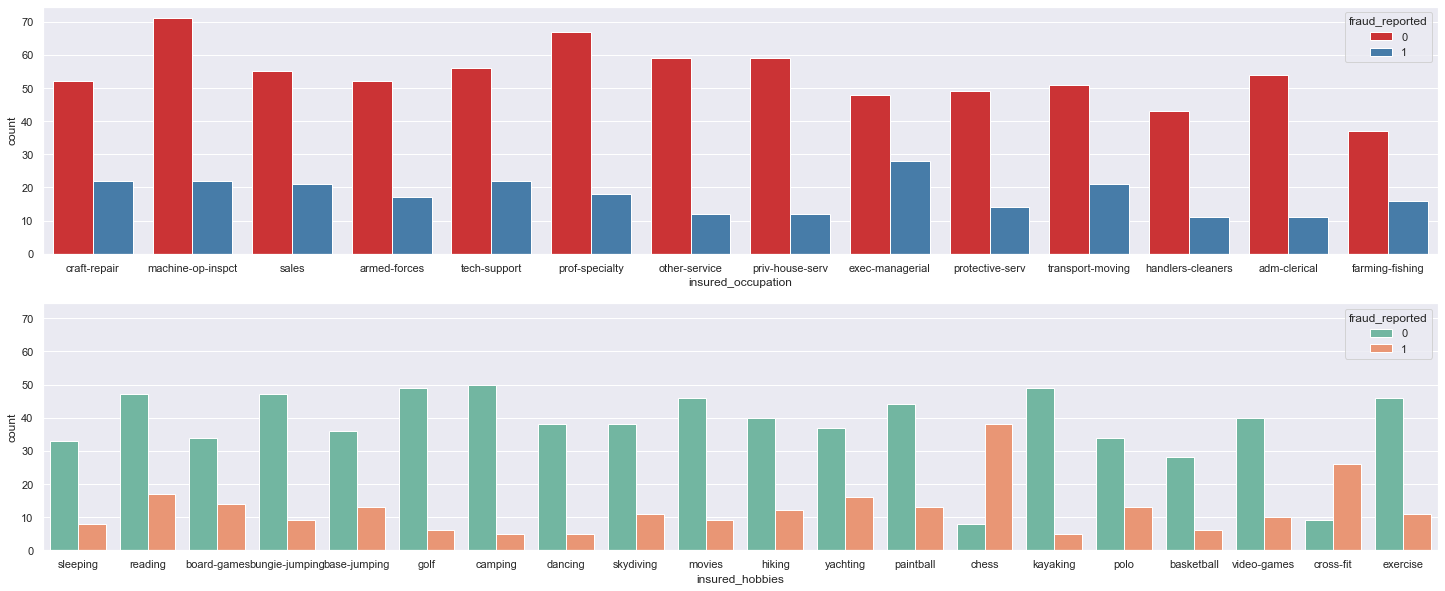

In [64]:
# Visualizing 'insured_occupation vs fraud_reported' and 'insured_hobbies vs fraud_reported' using countplot.

fig, axes = plt.subplots(2, 1, figsize=(25,10), sharey=True)
sns.countplot(x="insured_occupation", data=data, hue="fraud_reported", ax=axes[0], palette='Set1')
sns.countplot(x="insured_hobbies", data=data, hue="fraud_reported", ax=axes[1], palette='Set2')


In fig.1, most of the fraud is reported for occupation machine_op_inspect,prof_speciality,exec_managerial, and for other fraud_reported is moderate.

In fig.2, Cutomers with hobbies "chess" and "cross-fit" have highest frauds reported and others are almost equal.


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

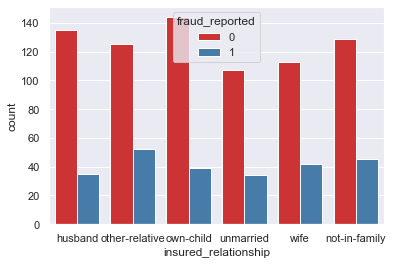

In [65]:
# Visualizing 'insured_relationship vs fraud_reported' using countplot.

sns.countplot(x="insured_relationship", data=data, hue="fraud_reported", palette='Set1')

Most of the fraud_reported for own child category of insured_relationship.

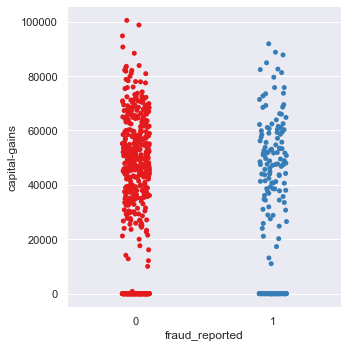

In [66]:
# visualizing 'capita_gain vs fraud_reported' column.
sns.catplot(data=data, x="fraud_reported", y="capital-gains", kind='strip', palette='Set1')

Most of the frauds are reported  for capital_gain and very less were not reported.

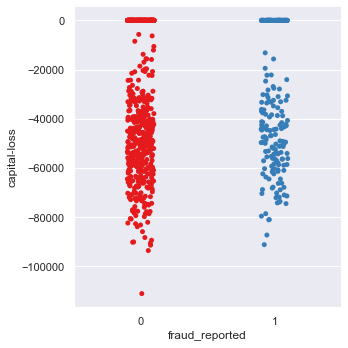

In [67]:
# visualizing 'capita-loss_ vs fraud_reported' column.
sns.catplot(data=data, x="fraud_reported", y="capital-loss", kind='strip', palette='Set1')

Most of fraud_reported for capital-loss and less were not reported.

<AxesSubplot:xlabel='incident_city', ylabel='count'>

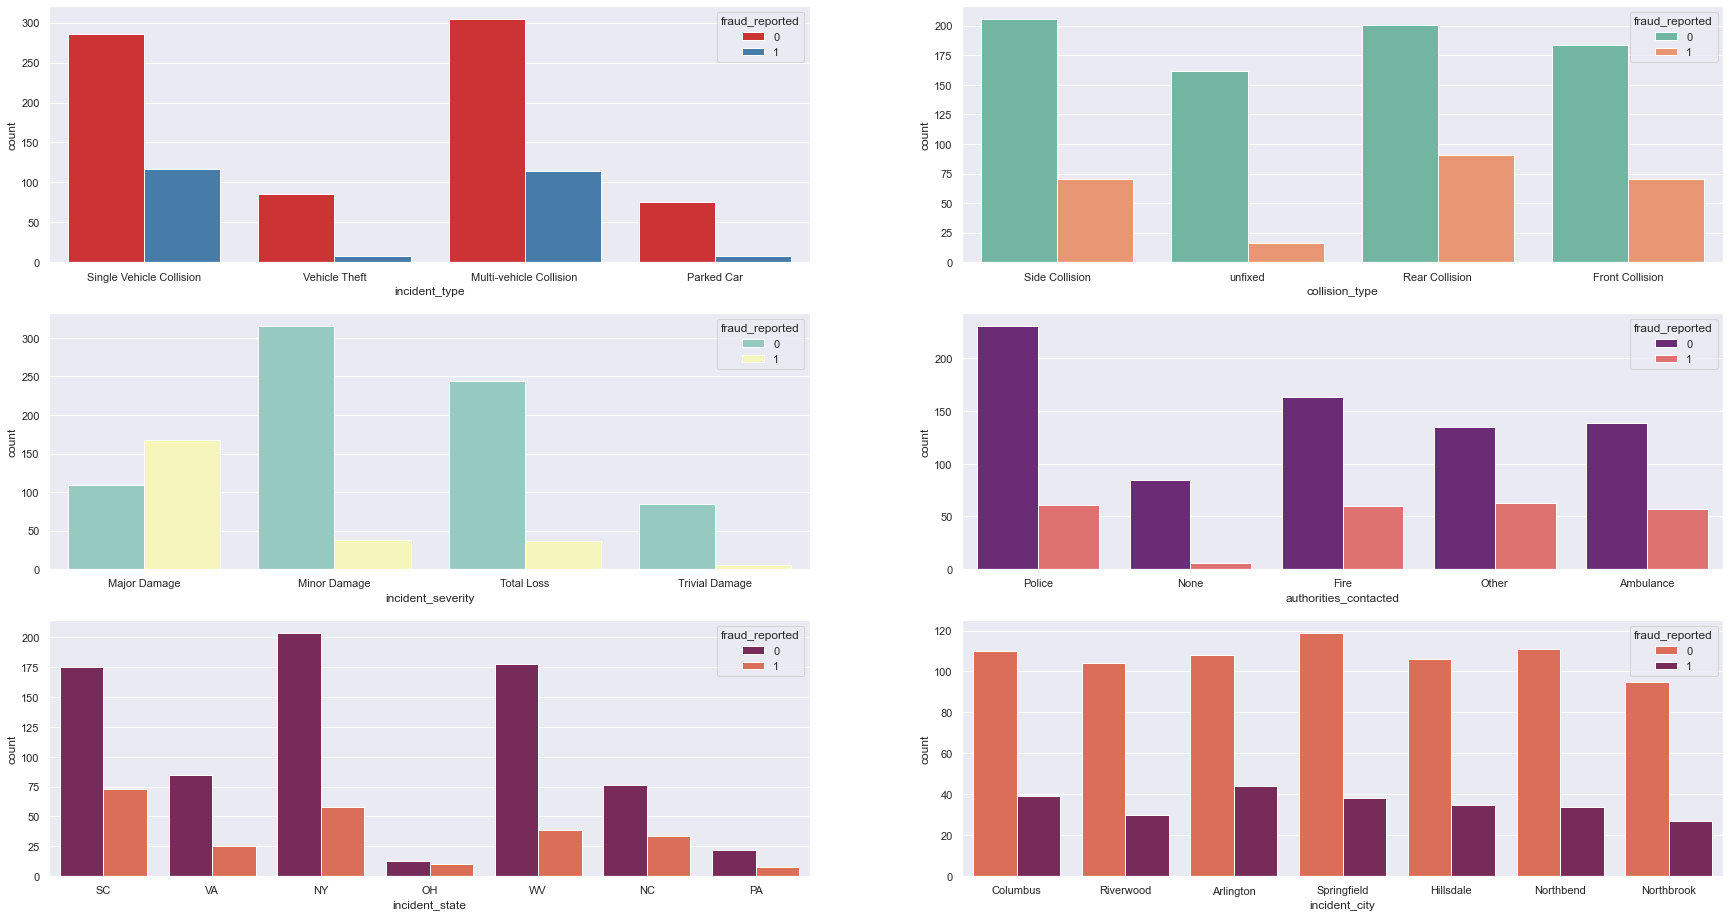

In [68]:
# Visualizing feature vs target columns for better understanding.

fig, axes = plt.subplots(3, 2, figsize=(30,16))
sns.countplot(x="incident_type", data=data, hue="fraud_reported", ax=axes[0,0], palette='Set1')
sns.countplot(x="collision_type", data=data, hue="fraud_reported", ax=axes[0,1], palette='Set2')
sns.countplot(x="incident_severity", data=data, hue="fraud_reported", ax=axes[1,0], palette='Set3')
sns.countplot(x="authorities_contacted", data=data, hue="fraud_reported", ax=axes[1,1], palette='magma')
sns.countplot(x="incident_state", data=data, hue="fraud_reported", ax=axes[2,0], palette='rocket')
sns.countplot(x="incident_city", data=data, hue="fraud_reported", ax=axes[2,1], palette='rocket_r')

1. Most of the fraud were reported for incident type multi-vehicle collision and single-vehicle collision. 

2. Most of the fraud_reported  are for side_collision and Rear_collision.

3. Most of the fraud_reported for incident_severity's category minor_damage and lowest for Trivial_Damage.

4. In most of the fraud_reported most of the authority called are police and lowest called is No authority.

5. Most of the fraud_reported are for incident_state NY and WV and lowest for OH and PA.

6. fraud reported in incident_city are almost equal for all categories of incident_city. 

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

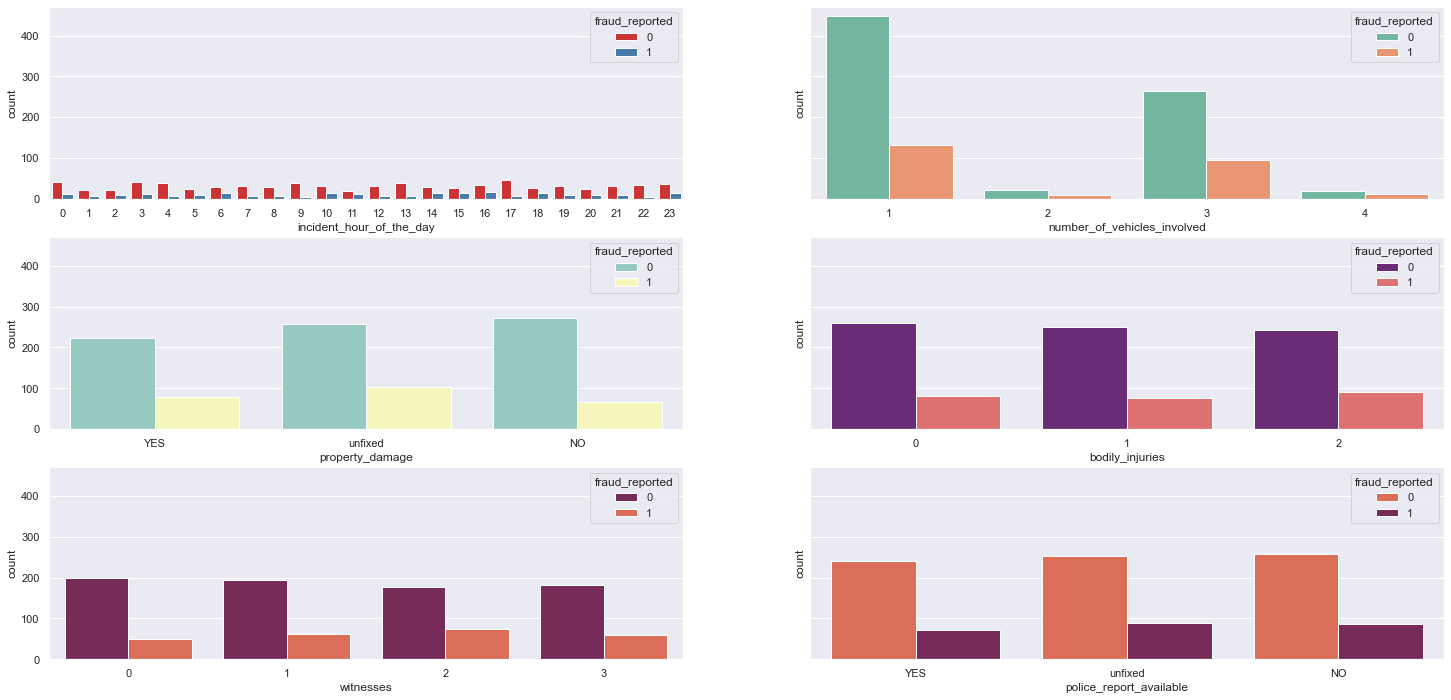

In [69]:
# Visualizing feature vs target columns for better understanding.

fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.countplot(x="incident_hour_of_the_day", data=data, hue="fraud_reported", ax=axes[0,0], palette='Set1')
sns.countplot(x="number_of_vehicles_involved", data=data, hue="fraud_reported", ax=axes[0,1], palette='Set2')
sns.countplot(x="property_damage", data=data, hue="fraud_reported", ax=axes[1,0], palette='Set3')
sns.countplot(x="bodily_injuries", data=data, hue="fraud_reported", ax=axes[1,1], palette='magma')
sns.countplot(x="witnesses", data=data, hue="fraud_reported", ax=axes[2,0], palette='rocket')
sns.countplot(x="police_report_available", data=data, hue="fraud_reported", ax=axes[2,1], palette='rocket_r')


1. Most of the frauds reports were reported at nights and all other are somewhat equal.
2. Most of the fraud reported with incidents happened by only one vehicle and least by 2 0r 4 vehicles.
3. Most of fraud reports have no records.
4. All fraud_reports have reported even bodily injuries.
5. All fraud_reports are reported with almost equal witnesses.
6. Most of the fraud reports  have not fixed police_report_available.

<AxesSubplot:xlabel='auto_model', ylabel='count'>

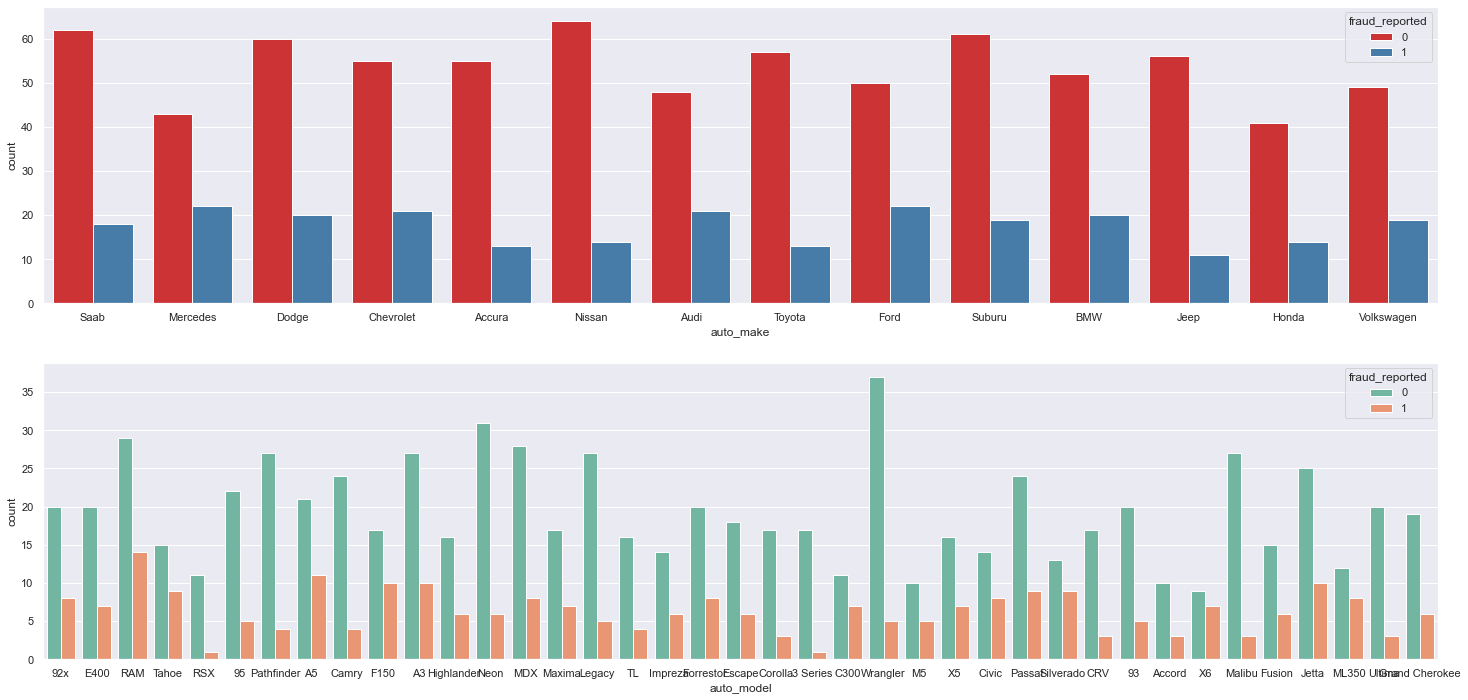

In [70]:
# Visualizing feature vs target columns for better understanding.

fig, axes = plt.subplots(2, 1, figsize=(25, 12))
sns.countplot(x="auto_make", data=data, hue="fraud_reported", ax=axes[0], palette='Set1')
sns.countplot(x="auto_model", data=data, hue="fraud_reported", ax=axes[1], palette='Set2')

1. Most of the fraud reported are almost equal for all makes except Honda,Audi and Mercedes.
2. Here some features shows more fraud_reports recorded and some shows less.

<AxesSubplot:xlabel='auto_year', ylabel='count'>

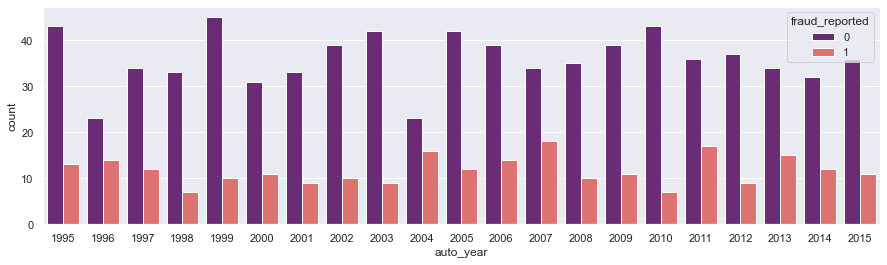

In [71]:
# Visualizing feature vs target columns for better understanding.

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
sns.countplot(x="auto_year", data=data, hue="fraud_reported", ax=axes, palette='magma')

Most of the fraud reported have almost equal auto_year except 1996,2000 and 2004.

<AxesSubplot:xlabel='incident_month', ylabel='count'>

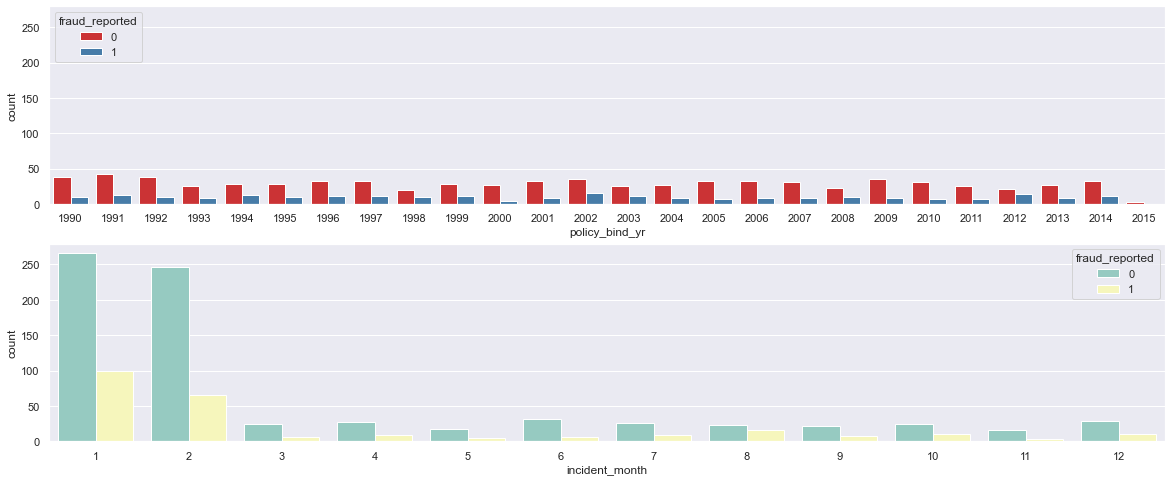

In [72]:
# Visualizing feature vs target columns for better understanding.

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 8), sharey=True)
sns.countplot(x="policy_bind_yr", data=data, hue="fraud_reported", ax=axes[0], palette='Set1')
sns.countplot(x="incident_month", data=data, hue="fraud_reported", ax=axes[1], palette='Set3')

1. Most of the frauds reports shows moderate policy binds.
2. most of the frauds are reported in 1st and 2nd months of incident_month.

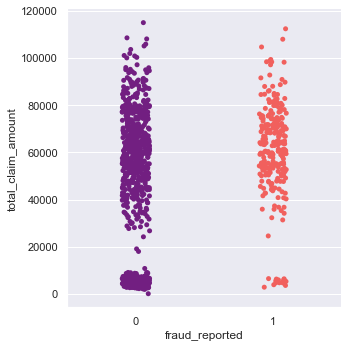

In [73]:
# Visualizing feature vs target columns for better understanding.

sns.catplot(data=data, x="fraud_reported", y="total_claim_amount", kind='strip', palette='magma')

The total_claim_amount for fraud cases is more than non-fraud cases.

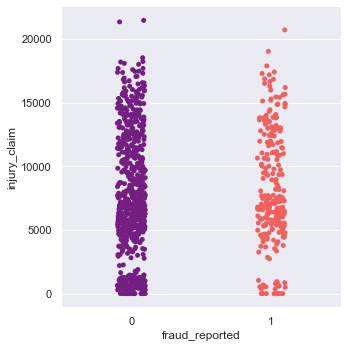

In [74]:
# Visualizing feature vs target columns for better understanding.

sns.catplot(data=data, x="fraud_reported", y="injury_claim", kind='strip', palette='magma')

Most of the fraud reports are reported for injury_claim than non_fraud reports.

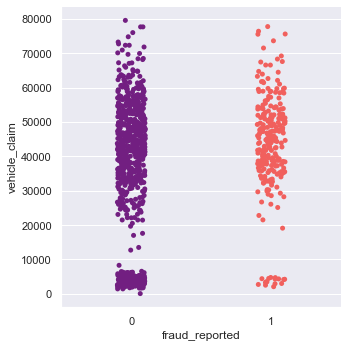

In [75]:
# Visualizing feature vs target columns for better understanding.

sns.catplot(data=data, x="fraud_reported", y="vehicle_claim", kind='strip', palette='magma')

Most of the fraud reports are reported for vehicle_claim and less for non fraud claim.

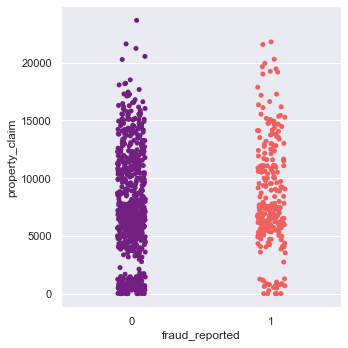

In [76]:
# Visualizing feature vs target columns for better understanding.

sns.catplot(data=data, x="fraud_reported", y="property_claim", kind='strip', palette='magma')

Most of the fraud reports are reported for property_claim and less for non fraud claim.

# Multi-variate Analysis

<Figure size 2880x4320 with 0 Axes>

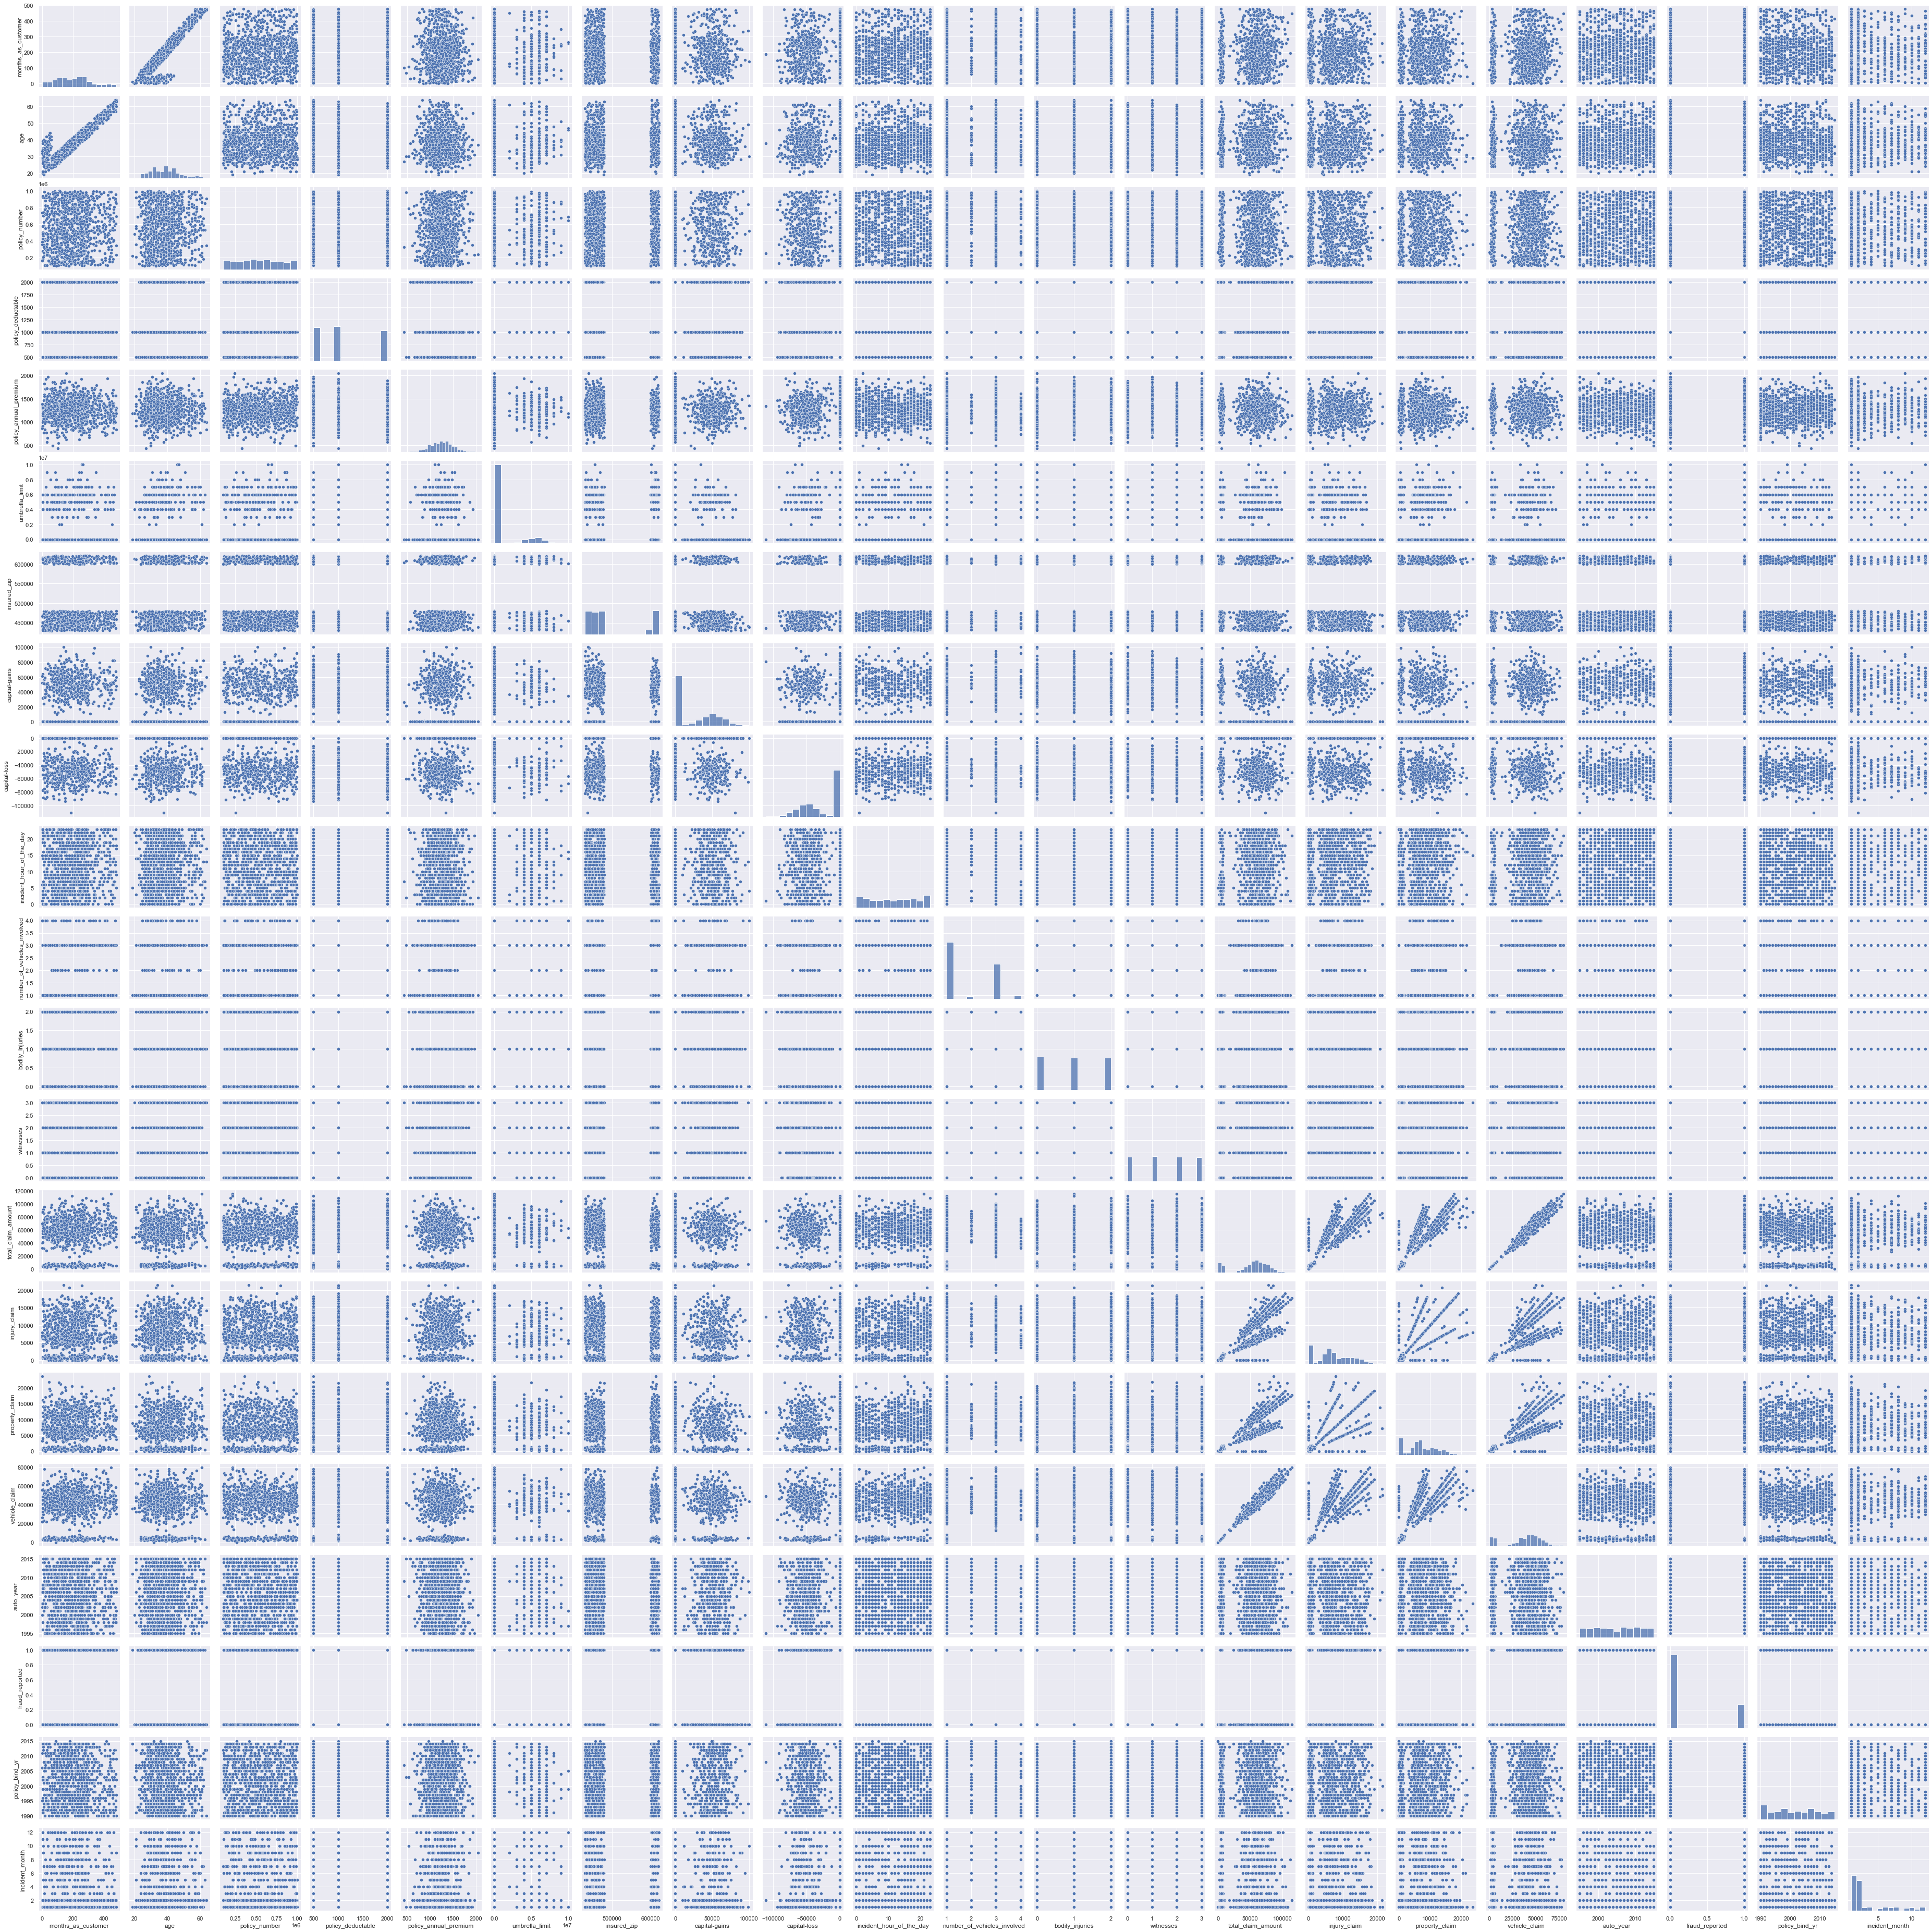

In [77]:
# Multivariate Analysis using pairplot.

plt.figure(figsize=(40,60))
sns.pairplot(data)
plt.show()

From above pairplot, We cannot surely say that there is any linear relationship between features and target columns

In [78]:
# Checking the umbrella limit shape >0.
data[data["umbrella_limit"] > 0].shape

(201, 41)

In [79]:
# Pointing the umbrella limit column to 0 and 1.
data["umbrella_limit"] = np.where(data["umbrella_limit"] > 0, 1, 0)

# Data Scaling

In [80]:
# Applying MinMaxScaler on continuous features

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
scaler = MinMaxScaler()

In [81]:
data_scaling = data.copy()

Scaling some features of dataset that needs scaling using MinMaxScaler

In [82]:
data["months_as_customer"] = scaler.fit_transform(data[["months_as_customer"]])
data["age"] = scaler.fit_transform(data[["age"]])
data["policy_annual_premium"] = scaler.fit_transform(data[["policy_annual_premium"]])

In [83]:
data["injury_claim"] = scaler.fit_transform(data[["injury_claim"]])
data["property_claim"] = scaler.fit_transform(data[["property_claim"]])
data["vehicle_claim"] = scaler.fit_transform(data[["vehicle_claim"]])

In [84]:
data["policy_bind_yr"] = scaler.fit_transform(data[["policy_bind_yr"]])
data["auto_year"] = scaler.fit_transform(data[["auto_year"]])

In [85]:
data["capital-gains"] = scaler.fit_transform(data[["capital-gains"]])
data["capital-loss"] = scaler.fit_transform(data[["capital-loss"]])

In [86]:
data.head()

months_as_customer       age  policy_number policy_bind_date policy_state  \
0            0.684760  0.644444         521585       2014-10-17           OH   
1            0.475992  0.511111         342868       2006-06-27           IN   
2            0.279749  0.222222         687698       2000-06-09           OH   
3            0.534447  0.488889         227811       1990-05-25           IL   
4            0.475992  0.555556         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000               0.603112               0   
1    250/500               2000               0.473214               1   
2    100/300               2000               0.606972               1   
3    250/500               2000               0.608582               1   
4   500/1000               1000               0.712760               1   

   insured_zip  ... total_claim_amount injury_claim property_claim  \
0       466132  ...              71610     0.303497       0.550063   
1       468176  ...               5070     0.036364       0.032953   
2       430632  ...              34650     0.358974       0.162653   
3       608117  ...              63400     0.295571       0.267850   
4       610706  ...               6500     0.060606       0.027461   

  vehicle_claim  auto_make  auto_model  auto_year fraud_reported  \
0      0.654296       Saab         92x       0.45              1   
1      0.043276   Mercedes        E400       0.60              1   
2      0.289722      Dodge         RAM       0.60              0   
3      0.637187  Chevrolet       Tahoe       0.95              1   
4      0.056359     Accura         RSX       0.70              0   

  policy_bind_yr incident_month  
0           0.96              1  
1           0.64              1  
2           0.40              2  
3           0.00             10  
4           0.96              2  

[5 rows x 41 columns]

We have succesfully scaled the unscaled features using MinMaxScaler.

In [87]:
# Dropping the irrelevent columns as they are not that much useful for model building.

data=data.drop(['incident_location','policy_number','policy_bind_date','insured_zip','incident_date','authorities_contacted','auto_make','auto_model'],axis=1)


In [88]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
       'fraud_reported', 'policy_bind_yr', 'incident_month'],
      dtype='object')

In [89]:
data.head()

months_as_customer       age policy_state policy_csl  policy_deductable  \
0            0.684760  0.644444           OH    250/500               1000   
1            0.475992  0.511111           IN    250/500               2000   
2            0.279749  0.222222           OH    100/300               2000   
3            0.534447  0.488889           IL    250/500               2000   
4            0.475992  0.555556           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0               0.603112               0        MALE                      MD   
1               0.473214               1        MALE                      MD   
2               0.606972               1      FEMALE                     PhD   
3               0.608582               1      FEMALE                     PhD   
4               0.712760               1        MALE               Associate   

  insured_occupation  ... witnesses police_report_available  \
0       craft-repair  ...         2                     YES   
1  machine-op-inspct  ...         0                 unfixed   
2              sales  ...         3                      NO   
3       armed-forces  ...         2                      NO   
4              sales  ...         1                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim auto_year  \
0               71610      0.303497       0.550063      0.654296      0.45   
1                5070      0.036364       0.032953      0.043276      0.60   
2               34650      0.358974       0.162653      0.289722      0.60   
3               63400      0.295571       0.267850      0.637187      0.95   
4                6500      0.060606       0.027461      0.056359      0.70   

  fraud_reported policy_bind_yr  incident_month  
0              1           0.96               1  
1              1           0.64               1  
2              0           0.40               2  
3              1           0.00              10  
4              0           0.96               2  

[5 rows x 33 columns]

In [90]:
# Encoding the categorical columns into numerical columns.

data=pd.get_dummies(data,columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','property_damage','police_report_available'],drop_first=True)

In [91]:
data.shape

(1000, 92)

# Splitting the dataset into train and test

In [92]:
from sklearn.model_selection import train_test_split
x=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,stratify=y, random_state=20)


In [94]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Model Building and Evaluation

# RandomForest Classifier

In [95]:
# Applying RandomForest Classifier for model building and evaluation. 

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 75.0
[[146   5]
 [ 45   4]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       151
           1       0.44      0.08      0.14        49

    accuracy                           0.75       200
   macro avg       0.60      0.52      0.50       200
weighted avg       0.69      0.75      0.68       200



# Decision Tree Classifier

In [96]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_dt)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy: 78.0
[[125  26]
 [ 18  31]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       151
           1       0.54      0.63      0.58        49

    accuracy                           0.78       200
   macro avg       0.71      0.73      0.72       200
weighted avg       0.79      0.78      0.79       200



# Logistic Regression

In [97]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_dt))

Accuracy: 75.5
[[151   0]
 [ 49   0]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       151
           1       0.54      0.63      0.58        49

    accuracy                           0.78       200
   macro avg       0.71      0.73      0.72       200
weighted avg       0.79      0.78      0.79       200



# Support Vector Classifier 

In [98]:
# Support Vector Classifier. 
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy: 75.5
[[151   0]
 [ 49   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



# XGB Classifier

In [99]:
# Applying XGB Classifier for model building and evaluation.

from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_xgb)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

Accuracy: 79.0
[[134  17]
 [ 25  24]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       151
           1       0.59      0.49      0.53        49

    accuracy                           0.79       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.78      0.79      0.78       200



# GradientBoostingClassifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_gbc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))


Accuracy: 82.0
[[138  13]
 [ 23  26]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       151
           1       0.67      0.53      0.59        49

    accuracy                           0.82       200
   macro avg       0.76      0.72      0.74       200
weighted avg       0.81      0.82      0.81       200



# Cross validation for each model

In [101]:
# Checking the cross validation score for Logistic Regression.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x,y,cv=10)
print('Cross_validation_score for LogisticRegression is:',cvs.mean())

Cross_validation_score for LogisticRegression is: 0.748


In [102]:
# Checking the cross validation score for RandomForestClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=10)
print('Cross_validation_score for RandomForestClassifier is:',cvs.mean())

Cross_validation_score for RandomForestClassifier is: 0.7619999999999999


In [103]:
# Checking the cross validation score for DecisionTreeClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=10)
print('Cross_validation_score for Decision tree classifier is:',cvs.mean())


Cross_validation_score for Decision tree classifier is: 0.785


In [104]:
# Checking the cross validation score for SVC.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=10)
print('Cross_validation_score for SVC is:',cvs.mean())


Cross_validation_score for SVC is: 0.7529999999999999


In [105]:
# Checking the cross validation score for GradientBoostingClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(gbc,x,y,cv=13)
print('Cross_validation_score for GradientBoosting Classifier is:',cvs.mean())


Cross_validation_score for GradientBoosting Classifier is: 0.8080209264419792


In [106]:
# Checking the cross validation score for XGBClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,x,y,cv=13)
print('Cross_validation_score for XGBClassifier is:',cvs.mean())


Cross_validation_score for XGBClassifier is: 0.8060229244439772


We choose the model on basis of lowest difference between model accuracy score and cross validation score of that model,we observe that we got less difference and good accuracy for two model GradientBoostClassifier,so we will perform hyper parameter tunning for it.

# Hyper Parameter Tunning using RandomisedSearchCV for GradientBoostClassifier

In [129]:
# Hyper parameter tunning for GradientBoost Classifier model.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_grid = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 100),
                 'max_depth': randint(1,20)}
# Initialization
gb = RandomizedSearchCV(gbc, param_distributions = param_grid, n_iter = 5,
                                   scoring = 'roc_auc')
# Fitting the model
gb.fit(x_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=5,
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000181E737F610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000181E739E4F0>},
                   scoring='roc_auc')

In [130]:
# Getting best parameters.
gb.best_params_

{'loss': 'exponential', 'max_depth': 4, 'n_estimators': 68}

In [135]:
gb.best_score_

0.8380310976901886

In [131]:
# Model Training.
best_fit = gb.best_estimator_.fit(x_train, y_train)

In [132]:
# Model Prediction.
pred_test=gb.best_estimator_.predict(x_test)

In [133]:
print("Accuracy:",accuracy_score(y_test,pred_test)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy: 82.0
[[138  13]
 [ 23  26]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       151
           1       0.67      0.53      0.59        49

    accuracy                           0.82       200
   macro avg       0.76      0.72      0.74       200
weighted avg       0.81      0.82      0.81       200



# Hyper Parameter Tunning using GridSearchCV for GradientBoostClassifier

In [136]:
# Hyper parameter tunning for GradientBoost Classifier model.


from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [137]:
# Initializing
cv = GridSearchCV(gbc,parameters,cv=5)
# Model Fiting
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [142]:
# Getting best parameters.
cv.best_params_

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 250}

In [143]:
cv.best_score_

0.8262499999999999

In [144]:
# Model Training.
best_fit = cv.best_estimator_.fit(x_train, y_train)

In [145]:
# Model Prediction.
pred_test=cv.best_estimator_.predict(x_test)

In [146]:
print("Accuracy:",accuracy_score(y_test,pred_test)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy: 81.0
[[135  16]
 [ 22  27]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       151
           1       0.63      0.55      0.59        49

    accuracy                           0.81       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.80      0.81      0.81       200



We did hyperparameter using RandomisedSearchCV and GridSearchCV for our best fir model i.e GradientBoostClassifier to get better accuracy and we got the better accuracy with RandomisedSearchCV and we got the accuracy of almost 82% which is good.

# Saving The Model

In [147]:
import joblib
joblib.dump(gb.best_estimator_,"Automobile_Insurance_Fraud.obj")

['Automobile_Insurance_Fraud.obj']